Script to produce 3 cleaned SolA datas and 3 GHI datas for certain date and certain site to demonstrate each mode

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pytz #for timezone calculation
import math
import matplotlib.dates as md
import gc
import os
from datetime import datetime
%matplotlib qt
%matplotlib inline

def input_monthly_files(file_path, data_date_idx):
    """Open time-series D-PV data and ghi data of a certain month. Only compatible for SoLA data format.

    Args:
        file_path (str): The file location of the data
        data_date_idx (str): The month of the files in format 'YYYYMM' eg '201907'

    Returns:
        data (df): the opened time-series D-PV data
        ghi (df): the opened ghi data
        
    Originally written by Baran for VVAr Curtailment Calculation.
    """
    
    data_path = file_path + r"/processed_unsw_" + data_date_idx + '_data_raw.csv'
    data = pd.read_csv(data_path, index_col = 1)

    # Convert timestamp to local Adelaide time
    data.index = pd.to_datetime(data.index) # convert index from object type to datetime
    Adelaide_local_time = pytz.timezone('Australia/Adelaide')
    data.index = data.index.tz_localize(pytz.utc).tz_convert(Adelaide_local_time) # convert utc to local adelaide time
    data.index.rename('Timestamp', inplace = True)

    # Load GHI data
    ghi_date_idx = data_date_idx[0:4] + '_' + data_date_idx[4:]
    ghi_path = file_path + r"/sl_023034_" + ghi_date_idx +'.txt'
    ghi = pd.read_csv (ghi_path) 

    ghi['timestamp'] = pd.to_datetime(pd.DataFrame ({'year' : ghi['Year Month Day Hours Minutes in YYYY'].values, 
                                                    'month' : ghi['MM'], 
                                                    'day' : ghi['DD'], 
                                                   'hour' : ghi['HH24'], 
                                                   'minute' : ghi['MI format in Local standard time']}))
    ghi.set_index('timestamp', inplace = True)
    # Deal with the space characters (ghi is in object/string form at the moment)
    ghi['Mean global irradiance (over 1 minute) in W/sq m'] = [float(ghi_t) if ghi_t.count(' ')<= 3 else np.nan for ghi_t in ghi['Mean global irradiance (over 1 minute) in W/sq m']]
    return data, ghi
 
#file_path = r"C:\Users\samha\Documents\CANVAS\data" #for CEEM09 TETB building
file_path = r"/Users/samhan/Downloads/data" #for Samhan laptop



In [3]:
#sample_1: tripping_non_clear_sky_sample
c_id = 1317822057
date = '2019-09-03'
month = date[:4] + date[5:7]
data_sample_1, ghi_sample_1 = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample_1.index.date == date_dt
site_id_filter = data_sample_1['c_id'] == c_id
data_sample_1 = data_sample_1.loc[date_filter & site_id_filter]

date_filter = ghi_sample_1.index.date == date_dt
ghi_sample_1 = ghi_sample_1.loc[date_filter]

#vvar_sample
c_id = 1018350709
date = '2019-07-20'
month = date[:4] + date[5:7]
data_sample_2, ghi_sample_2 = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample_2.index.date == date_dt
site_id_filter = data_sample_2['c_id'] == c_id
data_sample_2 = data_sample_2.loc[date_filter & site_id_filter]

date_filter = ghi_sample_2.index.date == date_dt
ghi_sample_2 = ghi_sample_2.loc[date_filter]

#vwatt_sample
c_id = 466930914
date = '2019-08-14'
month = date[:4] + date[5:7]
data_sample_3, ghi_sample_3 = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample_3.index.date == date_dt
site_id_filter = data_sample_3['c_id'] == c_id
data_sample_3 = data_sample_3.loc[date_filter & site_id_filter]

date_filter = ghi_sample_3.index.date == date_dt
ghi_sample_3 = ghi_sample_3.loc[date_filter]



data_sample_1.to_csv(file_path + '/data_sample_1.csv')
data_sample_2.to_csv(file_path + '/data_sample_2.csv')
data_sample_3.to_csv(file_path + '/data_sample_3.csv')


ghi_sample_1.to_csv(file_path + '/ghi_sample_1.csv')
ghi_sample_2.to_csv(file_path + '/ghi_sample_2.csv')
ghi_sample_3.to_csv(file_path + '/ghi_sample_3.csv')


In [6]:
#sample 4: vwatt_sample_json_tim, good for polyfit example
c_id = 1165442853
date = '2020-04-13'
month = date[:4] + date[5:7]
data_sample_4, ghi_sample_4 = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample_4.index.date == date_dt
site_id_filter = data_sample_4['c_id'] == c_id
data_sample_4 = data_sample_4.loc[date_filter & site_id_filter]

date_filter = ghi_sample_4.index.date == date_dt
ghi_sample_4 = ghi_sample_4.loc[date_filter]

data_sample_4.to_csv(file_path + '/data_sample_4.csv')
ghi_sample_4.to_csv(file_path + '/ghi_sample_4.csv')


KeyboardInterrupt



In [6]:
#sample 5: incomplete dataset
sample_num = 5
c_id = 1317822057
date = '2020-03-01'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()


date_filter = data_sample.index.date == date_dt
site_id_filter = data_sample['c_id'] == c_id
data_sample = data_sample.loc[date_filter & site_id_filter]

date_filter = ghi_sample.index.date == date_dt
ghi_sample = ghi_sample.loc[date_filter]

data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))

In [7]:
#sample 6: biggest vvar site, but don't know which date is good. Probably clear sky day in summer, January?
# clear sky day list: '2020-01-01', '2020-01-02', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-17', '2020-01-29', '2020-01-30'

#this turns out to be a very good vwatt sample
sample_num = 6
c_id = 898652745
date = '2020-01-17'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample.index.date == date_dt
site_id_filter = data_sample['c_id'] == c_id
data_sample = data_sample.loc[date_filter & site_id_filter]

date_filter = ghi_sample.index.date == date_dt
ghi_sample = ghi_sample.loc[date_filter]

data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))


In [8]:
#sample 7: biggest vvar site according to Baran's script, but don't know which date is good. Probably clear sky day in summer, January?
# clear sky day list: '2020-01-01', '2020-01-02', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-17', '2020-01-29', '2020-01-30'

#this turns out to be a very good vwatt sample
sample_num = 7
c_id = 1365659170
date = '2020-01-17'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample.index.date == date_dt
site_id_filter = data_sample['c_id'] == c_id
data_sample = data_sample.loc[date_filter & site_id_filter]

date_filter = ghi_sample.index.date == date_dt
ghi_sample = ghi_sample.loc[date_filter]

data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))


In [4]:
# sample 8 - 10 are samples of clear sky data with no curtailment (good power output)

#sample 8
sample_num = 8
c_id = 1700492033
date = '2020-01-17'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample.index.date == date_dt
site_id_filter = data_sample['c_id'] == c_id
data_sample = data_sample.loc[date_filter & site_id_filter]

date_filter = ghi_sample.index.date == date_dt
ghi_sample = ghi_sample.loc[date_filter]

data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))

#sample 9
sample_num = 9
c_id = 389622988
date = '2020-01-17'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample.index.date == date_dt
site_id_filter = data_sample['c_id'] == c_id
data_sample = data_sample.loc[date_filter & site_id_filter]

date_filter = ghi_sample.index.date == date_dt
ghi_sample = ghi_sample.loc[date_filter]

data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))

#sample 10
sample_num = 10
c_id = 1814154495
date = '2020-01-17'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample.index.date == date_dt
site_id_filter = data_sample['c_id'] == c_id
data_sample = data_sample.loc[date_filter & site_id_filter]

date_filter = ghi_sample.index.date == date_dt
ghi_sample = ghi_sample.loc[date_filter]

data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))

In [5]:
# sample 11 - 13 are samples of clear sky data with tripping

#sample 11
sample_num = 11
c_id = 2084803628
date = '2020-01-17'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample.index.date == date_dt
site_id_filter = data_sample['c_id'] == c_id
data_sample = data_sample.loc[date_filter & site_id_filter]

date_filter = ghi_sample.index.date == date_dt
ghi_sample = ghi_sample.loc[date_filter]

data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))

#sample 12
sample_num = 12
c_id = 1817947752
date = '2020-01-17'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample.index.date == date_dt
site_id_filter = data_sample['c_id'] == c_id
data_sample = data_sample.loc[date_filter & site_id_filter]

date_filter = ghi_sample.index.date == date_dt
ghi_sample = ghi_sample.loc[date_filter]

data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))

#sample 13
sample_num = 13
c_id = 939510347
date = '2020-01-17'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample.index.date == date_dt
site_id_filter = data_sample['c_id'] == c_id
data_sample = data_sample.loc[date_filter & site_id_filter]

date_filter = ghi_sample.index.date == date_dt
ghi_sample = ghi_sample.loc[date_filter]

data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))

In [6]:
#sample 14 is a clear sky day with VVAr curtailment
#sample 14
sample_num = 14
c_id = 173654980
date = '2020-01-17'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample.index.date == date_dt
site_id_filter = data_sample['c_id'] == c_id
data_sample = data_sample.loc[date_filter & site_id_filter]

date_filter = ghi_sample.index.date == date_dt
ghi_sample = ghi_sample.loc[date_filter]

data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))

In [26]:
sample1 = pd.read_csv(file_path + '/data_sample_1.csv')
sample2 = pd.read_csv(file_path + '/data_sample_2.csv')
sample3 = pd.read_csv(file_path + '/data_sample_3.csv')
sample4 = pd.read_csv(file_path + '/data_sample_4.csv')
sample5 = pd.read_csv(file_path + '/data_sample_5.csv')
sample6 = pd.read_csv(file_path + '/data_sample_6.csv')
sample7 = pd.read_csv(file_path + '/data_sample_7.csv')

In [27]:
print(len(sample1))
print(len(sample2))
print(len(sample3))
print(len(sample4))
print(len(sample5))
print(len(sample6))
print(len(sample7))

1433
1432
1437
1228
22
1497
17272


In [20]:
unique_cids = pd.read_csv(file_path + '/UniqueCids.csv')
circuit_details = pd.read_csv(file_path + r"/unsw_20190701_circuit_details.csv")
site_details = pd.read_csv (file_path + r"/unsw_20190701_site_details.csv")
site_details = site_details.merge(circuit_details, left_on = 'site_id', right_on = 'site_id')

In [11]:
c_id_lists = unique_cids['c_id'].values

In [12]:
#sample 8: clear sky day without curtailment
# clear sky day list: '2020-01-01', '2020-01-02', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-17', '2020-01-29', '2020-01-30'

#this turns out to be a very good vwatt sample
sample_num = 8

date = '2020-01-17'
month = date[:4] + date[5:7]
data_sample, ghi_sample = input_monthly_files(file_path, month)
date_dt = dt.datetime.strptime(date, '%Y-%m-%d').date()

date_filter = data_sample.index.date == date_dt
data_sample = data_sample.loc[date_filter]

#date_filter = ghi_sample.index.date == date_dt
#ghi_sample = ghi_sample.loc[date_filter]

#data_sample.to_csv(file_path + '/data_sample_{}.csv'.format(sample_num))
#ghi_sample.to_csv(file_path + '/ghi_sample_{}.csv'.format(sample_num))


In [14]:
data = data_sample.copy()

In [36]:
def site_organize(c_id_idx, site_details, data, unique_cids):
    """Get a single site data and relevant meta-data information.

    Args:
        c_id_idx (int): c_id value
        site_details (df): site_details dataframe from unsw_20190701_site_details.csv file
        data (df): D-PV time-series dataframe from input_monthly_file function output
        unique_cids (df): Dataframe listing unique c_id's and their corresponding site_id

    Returns:
        data_site(df): D-PV time-series dataframe, filtered by its site_id and cleaned (polarity correction etc)
        ac_cap (float): inverter capacity in W
        dc_cap (float): PV array capacity in Wp
        eff_system (float): Assumed PV array efficiency between 0 and 1
        inverter (str): Concatenated string of inverter manufacturer and model
        
    Originally written by Baran for VVAr Curtailment Calculation.
    """
    
    #c_id = unique_cids.loc[c_id_idx][0]
    c_id = c_id_idx
    
    polarity = site_details.loc[site_details['c_id'] == c_id, 'polarity'].values[0] # get the polarity of the site
    ac_cap = site_details.loc[site_details['c_id'] == c_id, 'ac_cap_w'].values[0]
    dc_cap = site_details.loc[site_details['c_id'] == c_id, 'dc_cap_w'].values[0]
    inverter = site_details.loc[site_details['c_id'] == c_id, 'inverter_manufacturer'].values[0] + ' ' + site_details.loc[site_details['c_id'] == c_id, 'inverter_model'].values[0]

    # Extract single site data and organize: 
    data_site = data[data['c_id'] == c_id].sort_index() # get the monthly data of the specific c_id

    data_site['power'] = data_site['power'].values * polarity # polarity correction for real power
    data_site.loc[data_site['power'] < 0, 'power'] = 0 #replace negative power value into zero
    data_site['reactive_power'] = data_site['reactive_power'].values * polarity # polarity correction for reactive power
    
    try:
        data_site['reactive_power'] = [data_site['reactive_power'].values * -1 if np.percentile(data_site.loc[(data_site.index.hour >= 7) & (data_site.index.hour <= 17), 'reactive_power'], 75) < 0 else data_site['reactive_power'].values][0]  # double check the polarity for reactive power
        if (abs(np.percentile(data_site['reactive_power'], 99))> ac_cap) | (abs(np.percentile(data_site['reactive_power'], 1))> ac_cap): #some VAr measurements in energy format and needs to be divided by duration (i.e., 60 sec)
            # data_site['reactive_power'] =  data_site['reactive_power'].values / data_site['duration'].values # unfortunately SolA data doesn't calculate energy according to respective duration but uses a fixed 60 sec values for energy calculation
            data_site['reactive_power'] =  data_site['reactive_power'].values / 60
    except:
        pass

        
    data_site.index = pd.to_datetime([str(d)[0:19] for d in data_site.index]) ## convert index to make the df plottable (by removing the UTC conversion)
    data_site.sort_index(ascending = True, inplace = True) # sort the index in ascending form
    # System efficiency for calculating theoretical max output later on (use conservative loss estimates for DC power)
    eff_inv = 0.98
    eff_vdrop = 0.98 
    eff_derating = 0.99  # module derating losses
    eff_system = eff_inv * eff_vdrop * eff_derating

    # Apparent power of the inverter
    data_site['va'] = np.sqrt (data_site['power'].values**2 + data_site['reactive_power'].values**2)
    data_site['pf'] = data_site['power']/data_site['va']
    
    return data_site, ac_cap, dc_cap, eff_system, inverter

def resample_in_minute(data):
    ''' Check whether the length of the data is in 5 s (more than 10k rows), then resample it into per minute.
    Args:
        data(df) : D-PV time series data

    Returns:
        data(df) : D-PV time series data in min  
    '''
    
    if len(data) > 2000:
        data = data.resample('min').agg({
            'c_id' : np.mean,
            'energy' : np.sum,
            'power' : np.mean,
            'reactive_power' : np.mean,
            'voltage' : np.mean,
            'duration' : np.sum,
            'va' : np.mean,
            'pf' : np.mean
        })
    return data

In [24]:
data['Timestamp'] = data.index.copy().astype(str)
data['Timestamp'] = pd.to_datetime(data['Timestamp'].str.slice(0, 19, 1))
data.set_index('Timestamp', inplace=True)

In [29]:
date

'2020-01-17'

Clear Sky Day with no curtailment in power output:
sample 8 : 
date = '2020-01-17'
c_id = 1700492033
c_id = 389622988
c_id = 1814154495

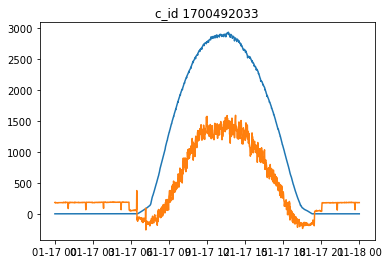

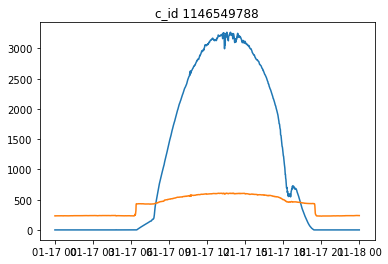

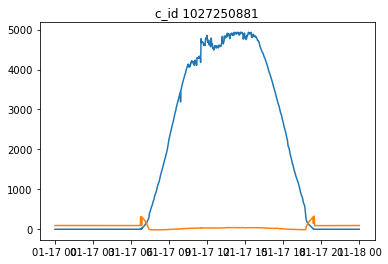

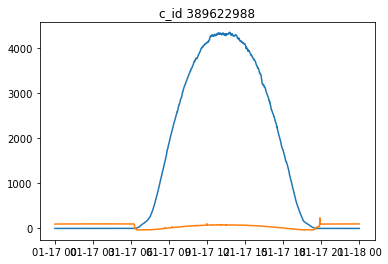

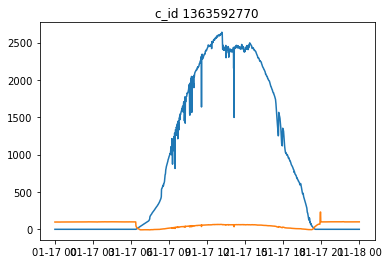

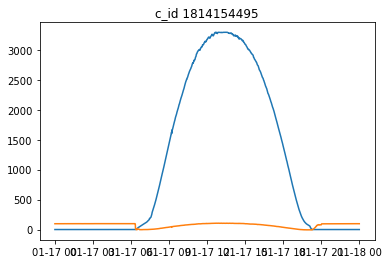

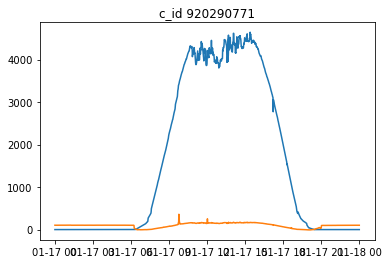

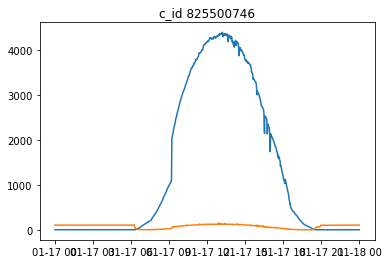

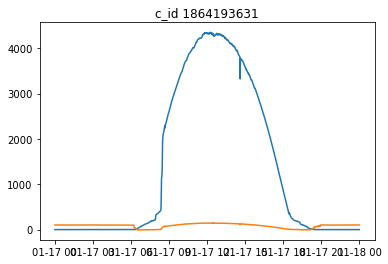

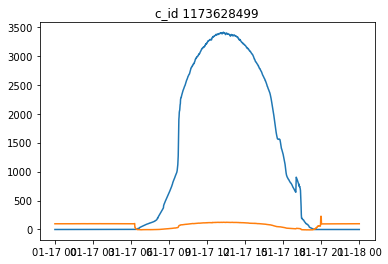

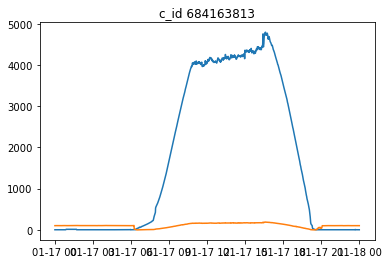

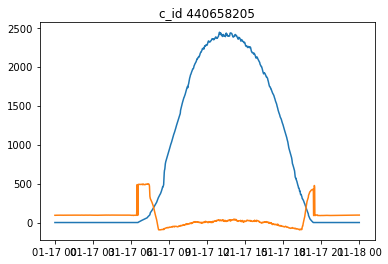

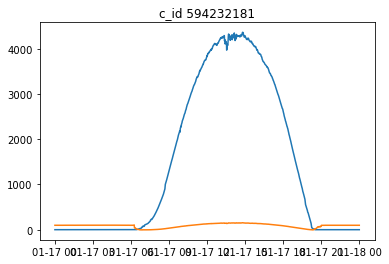

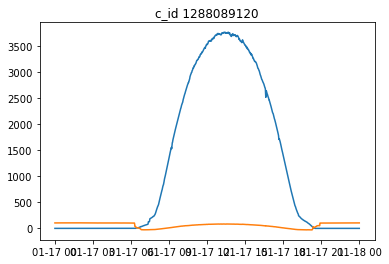

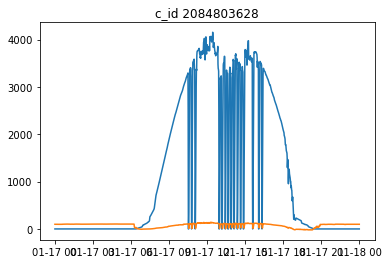

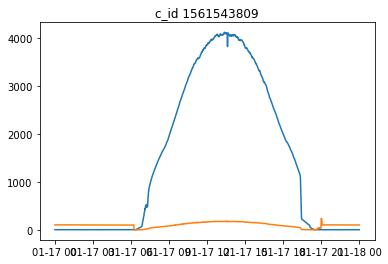

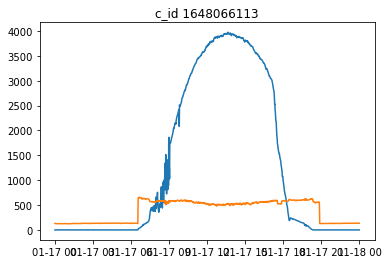

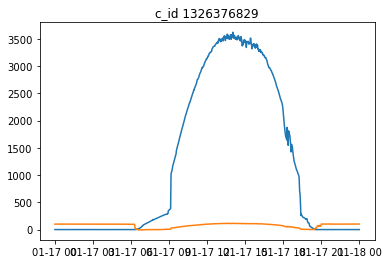

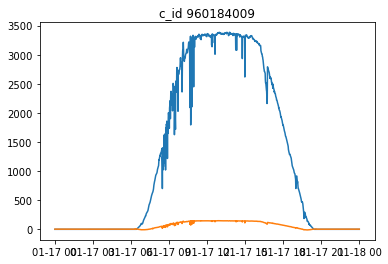

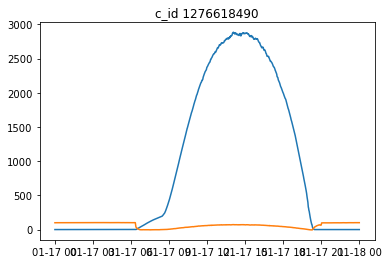

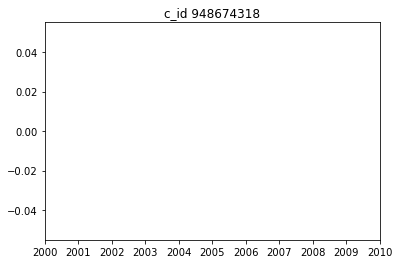

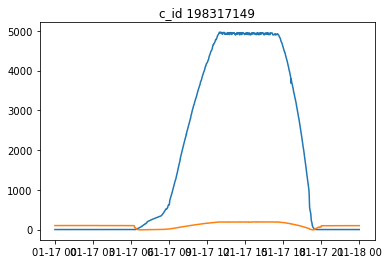

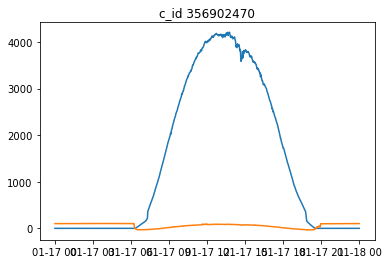

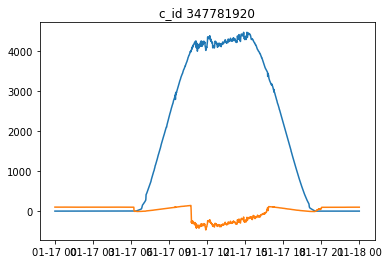

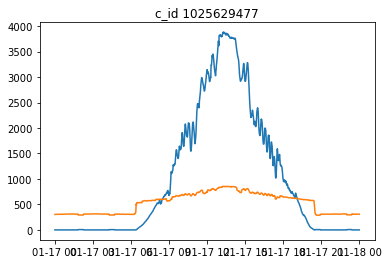

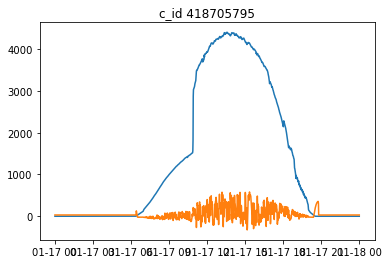

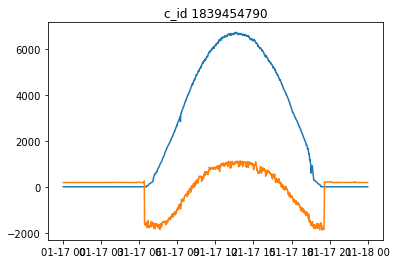

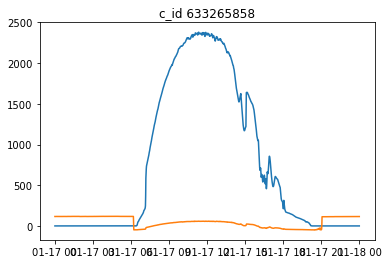

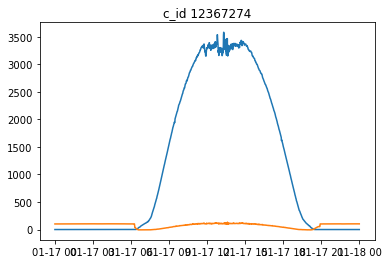

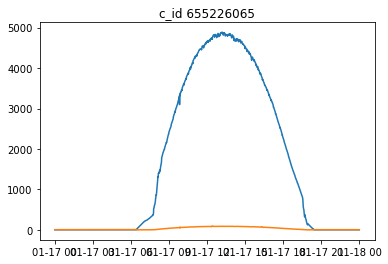

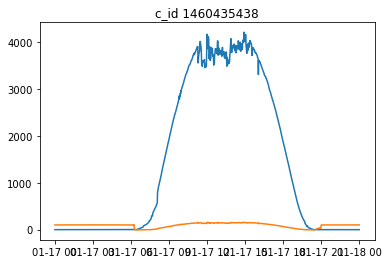

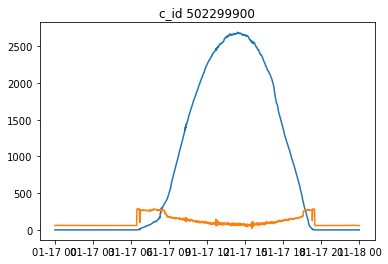

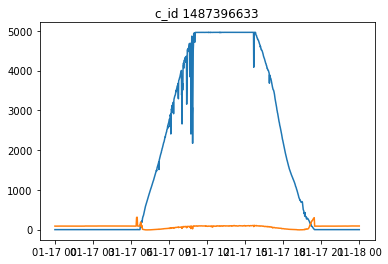

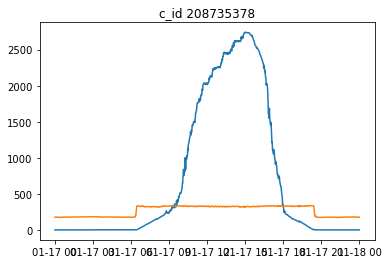

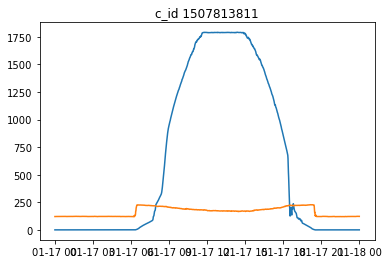

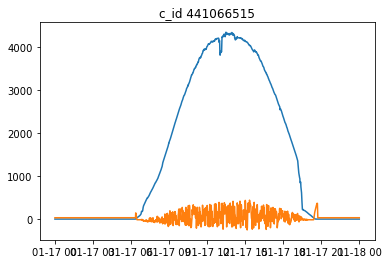

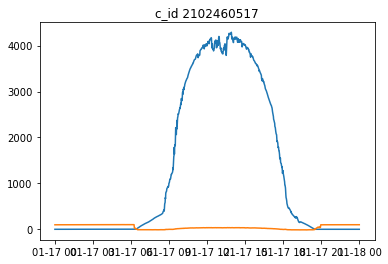

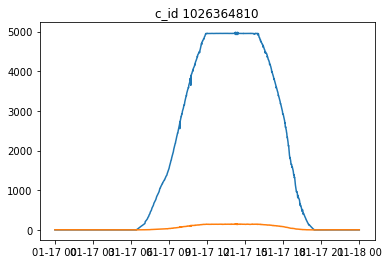

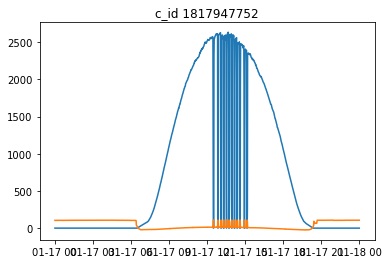

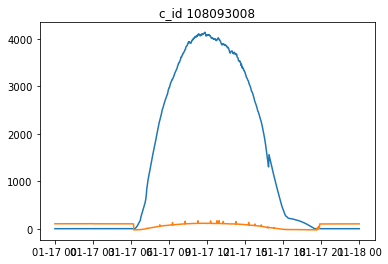

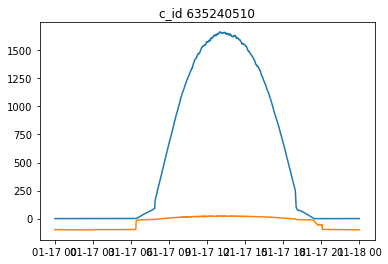

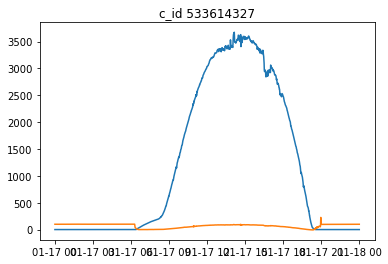

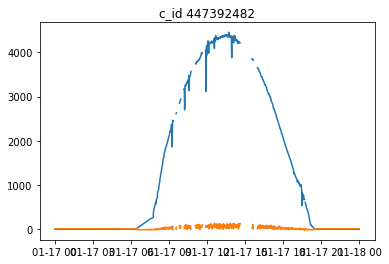

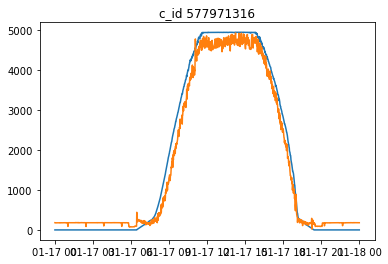

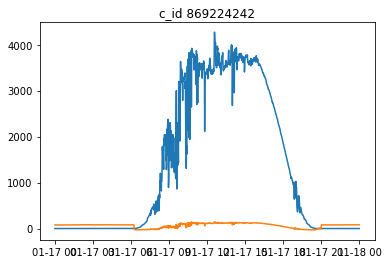

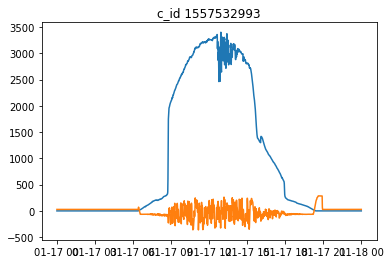

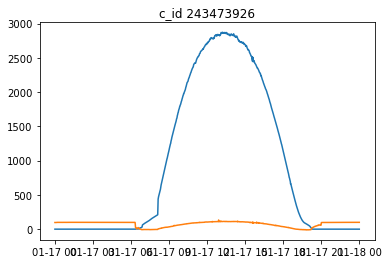

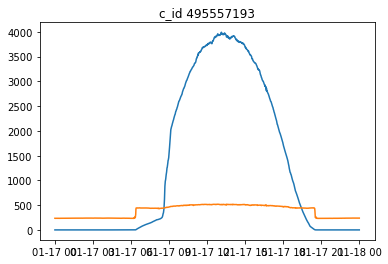

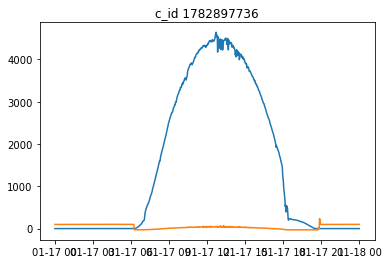

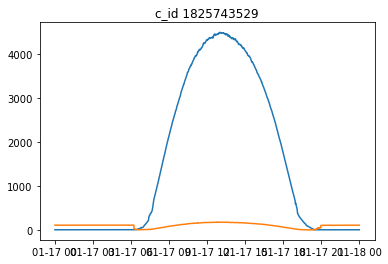

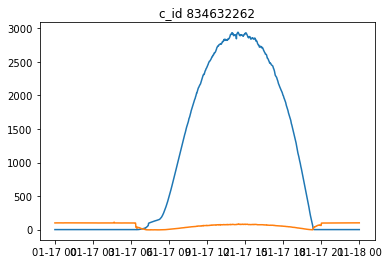

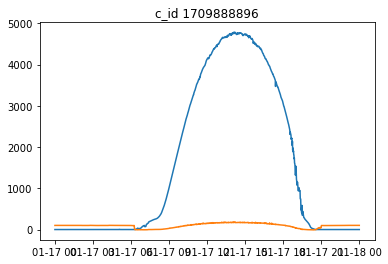

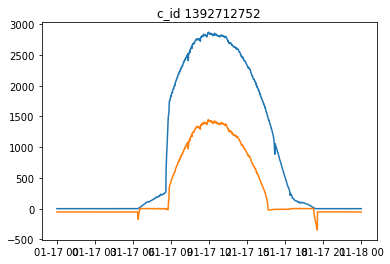

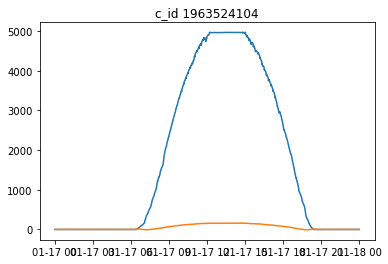

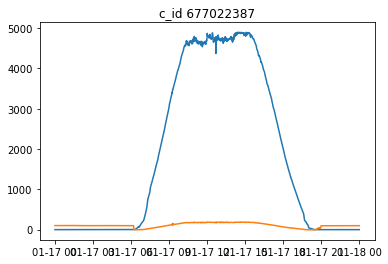

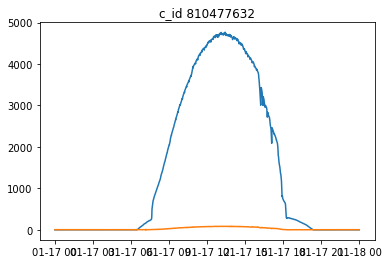

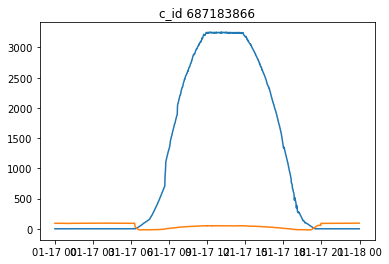

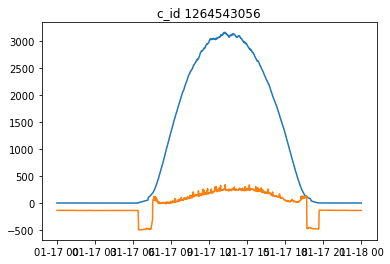

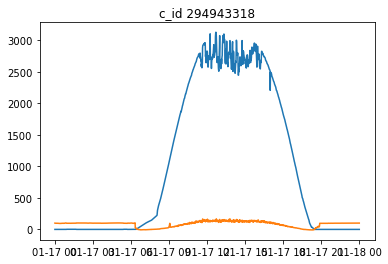

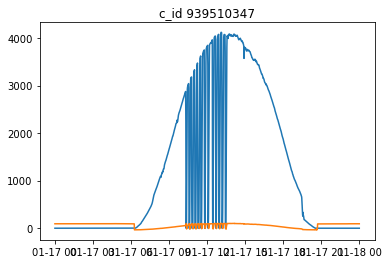

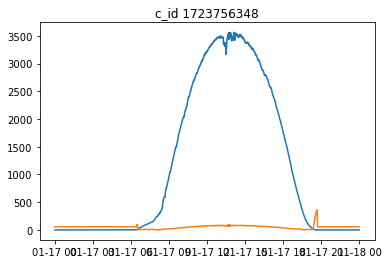

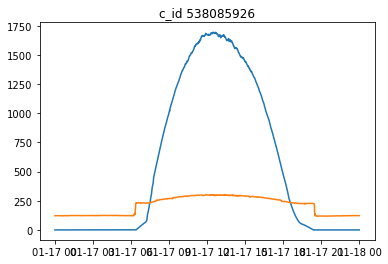

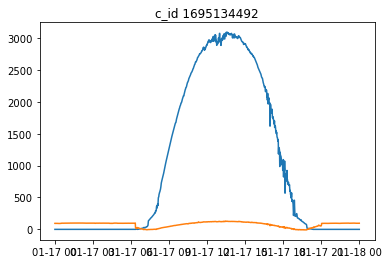

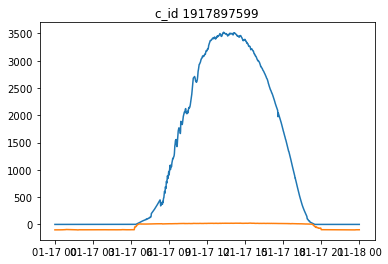

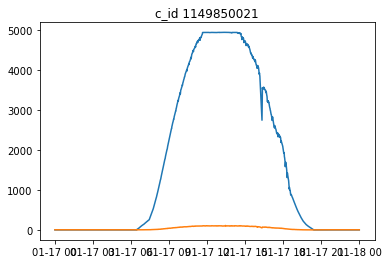

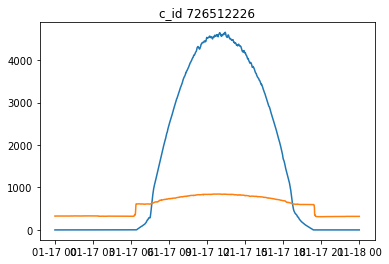

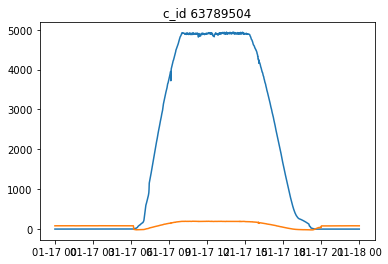

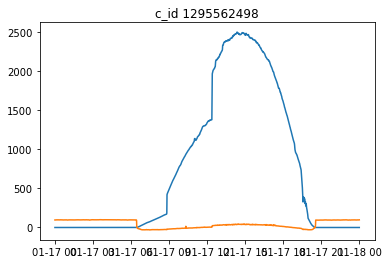

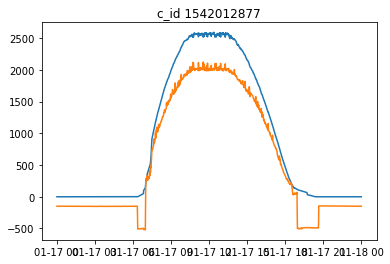

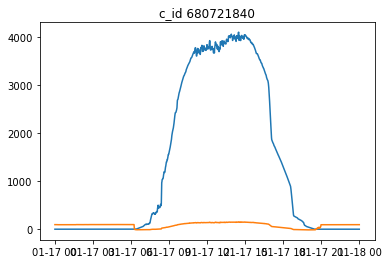

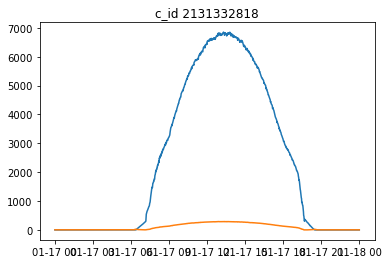

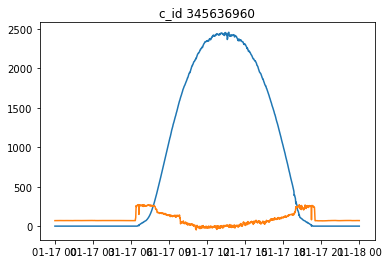

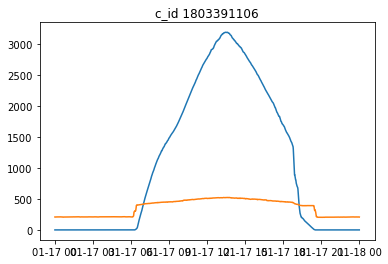

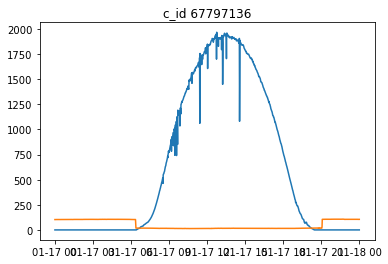

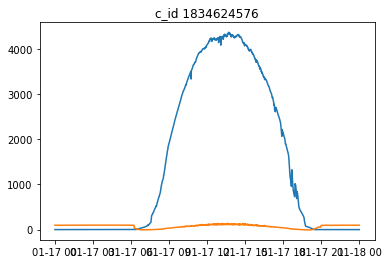

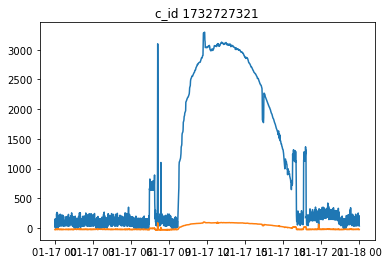

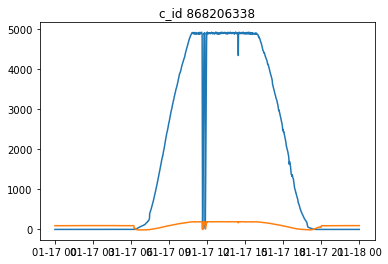

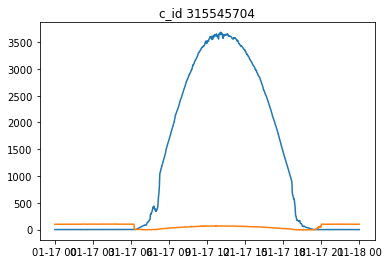

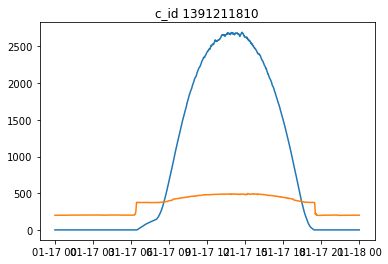

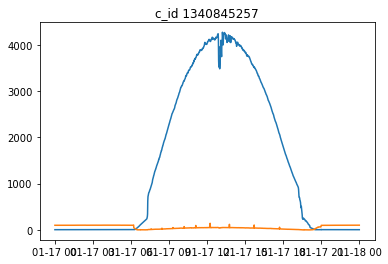

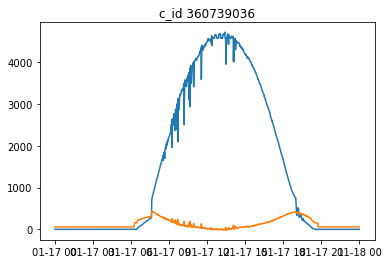

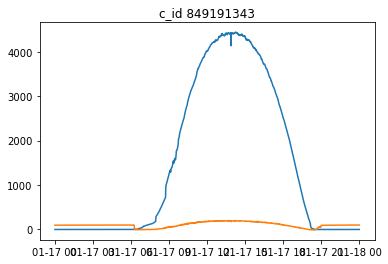

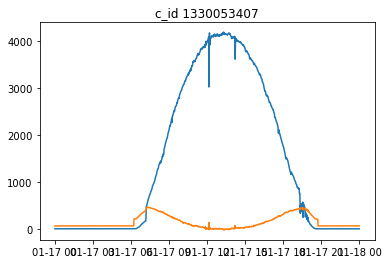

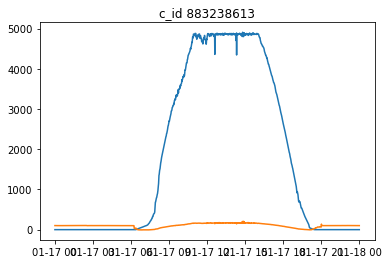

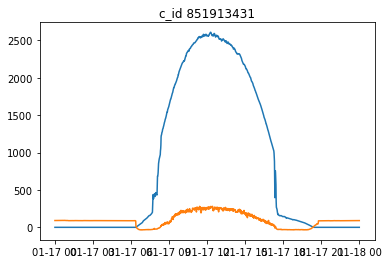

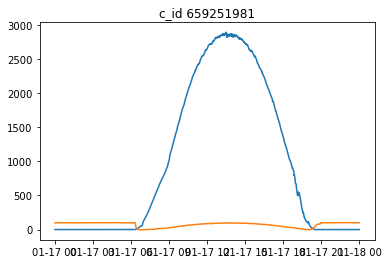

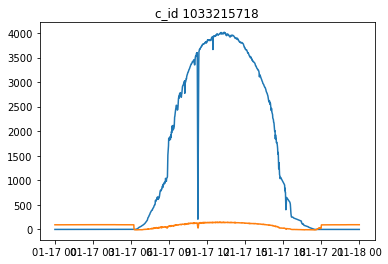

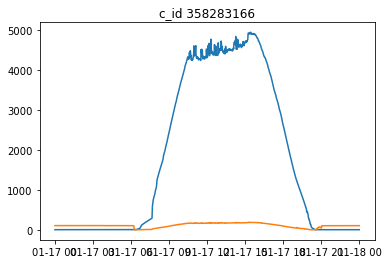

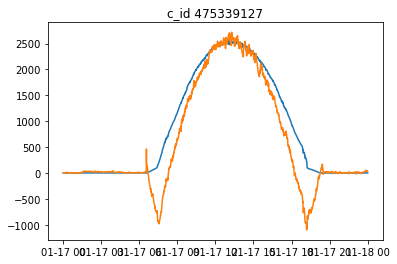

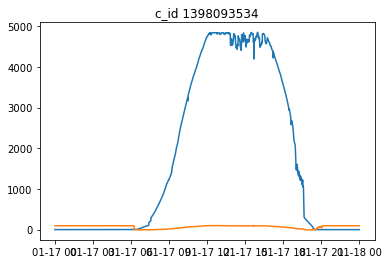

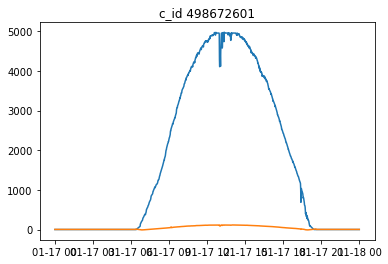

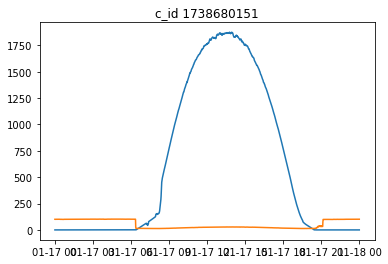

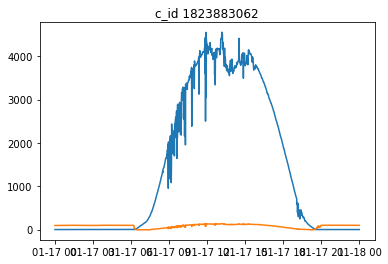

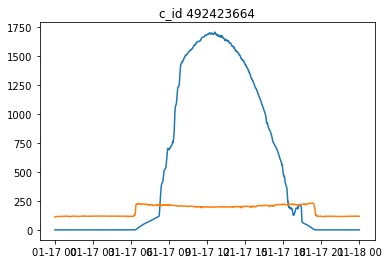

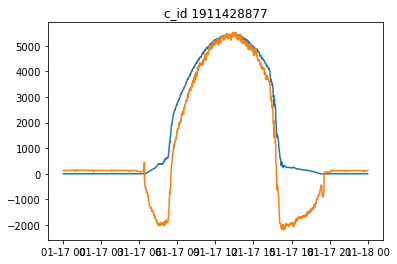

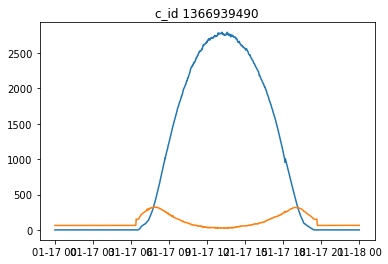

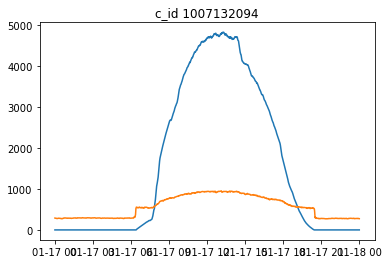

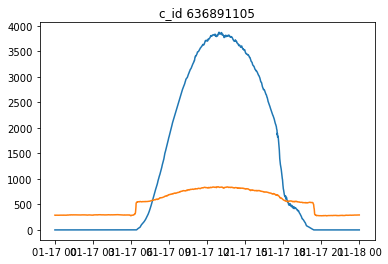

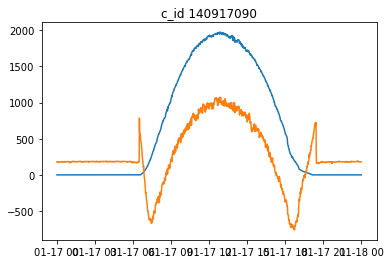

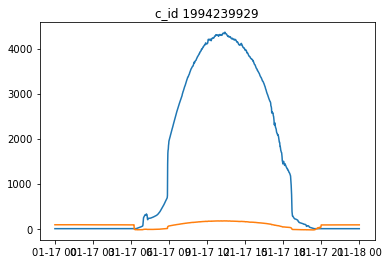

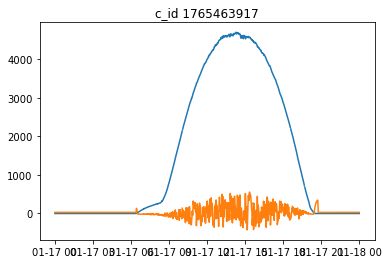

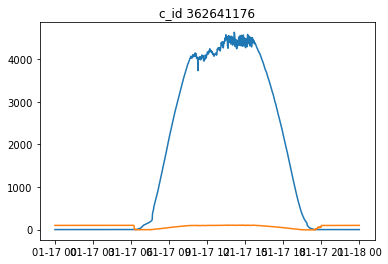

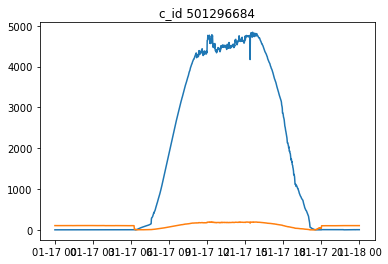

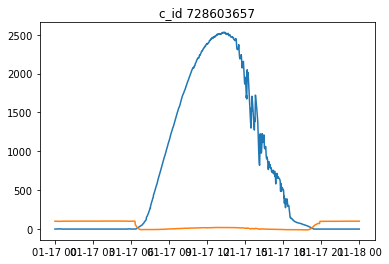

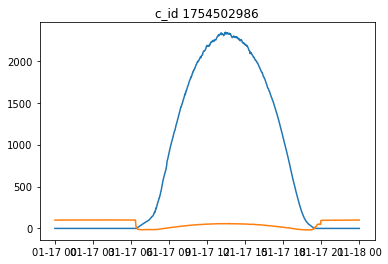

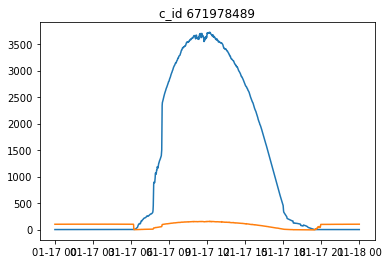

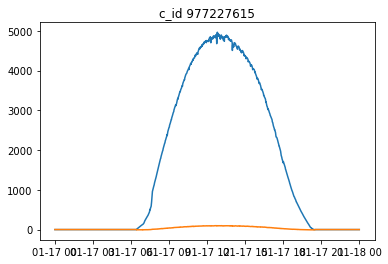

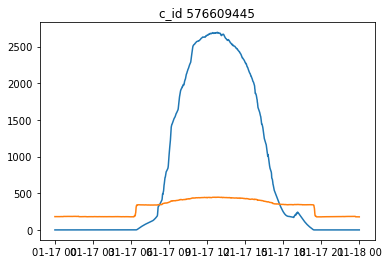

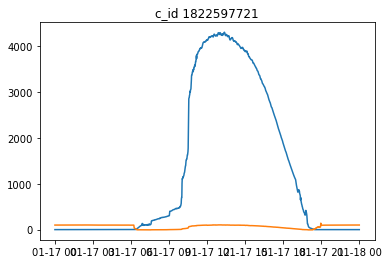

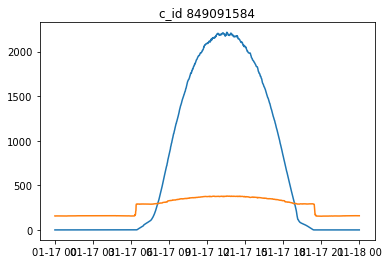

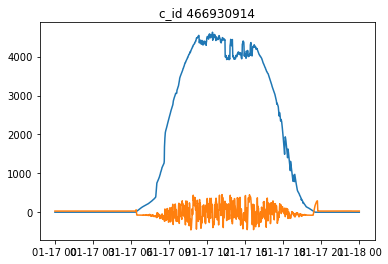

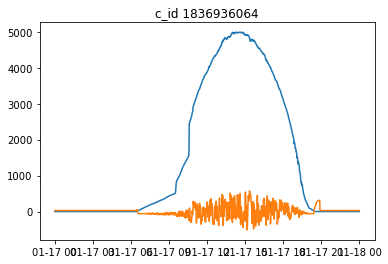

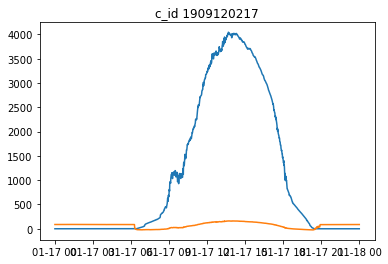

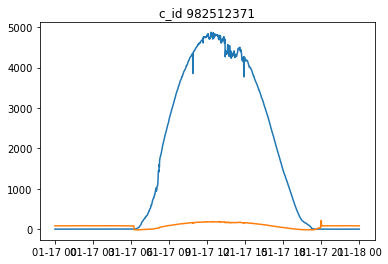

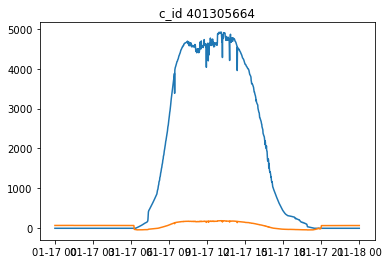

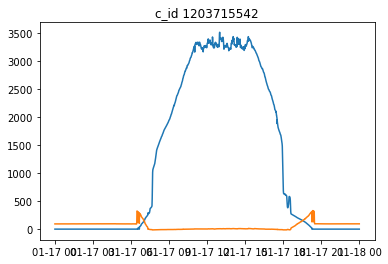

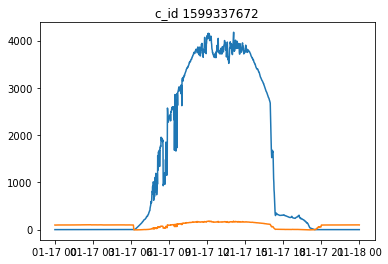

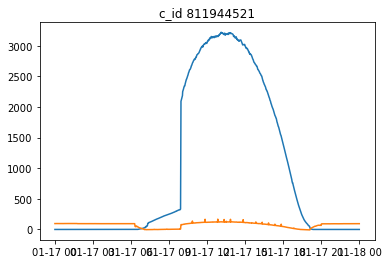

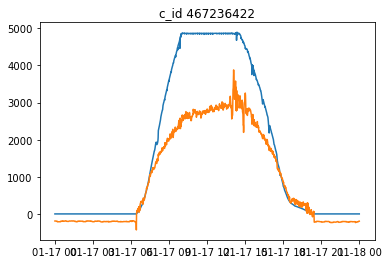

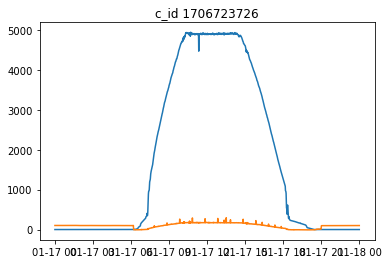

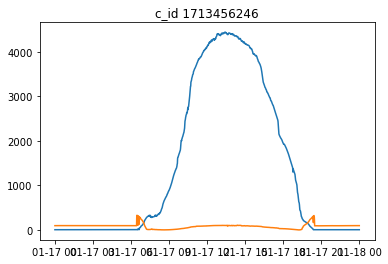

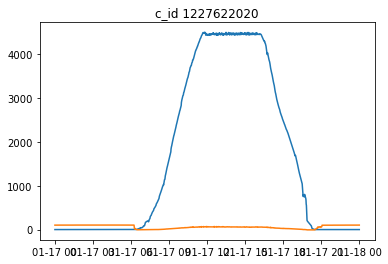

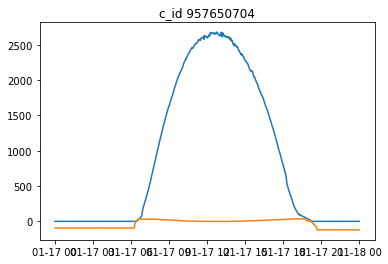

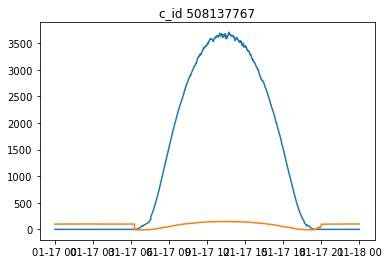

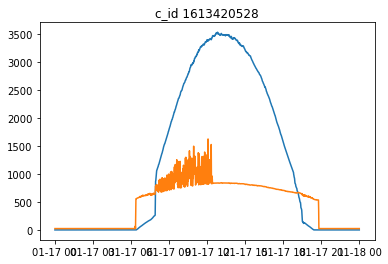

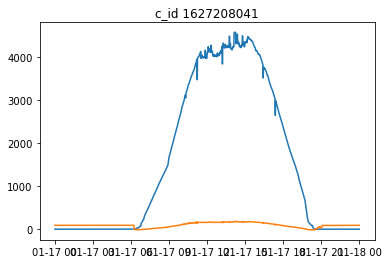

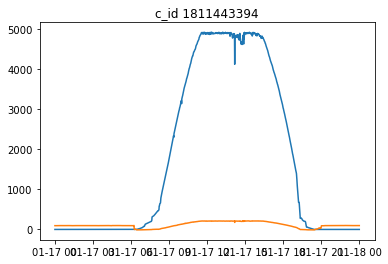

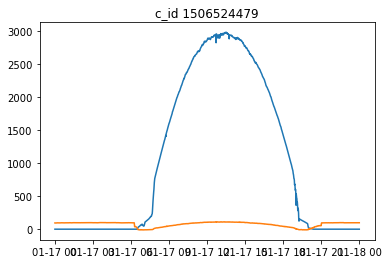

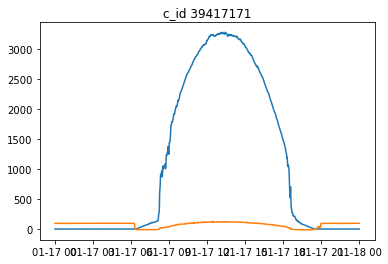

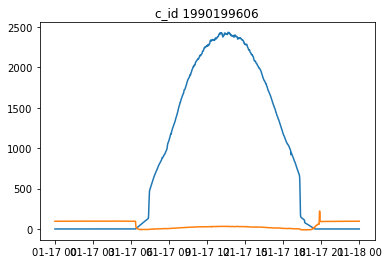

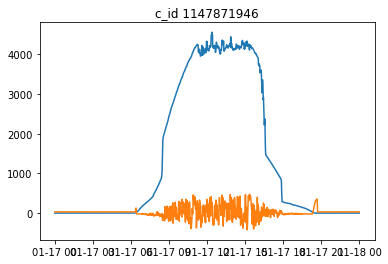

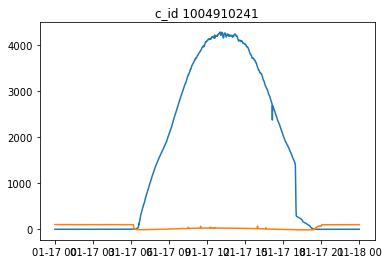

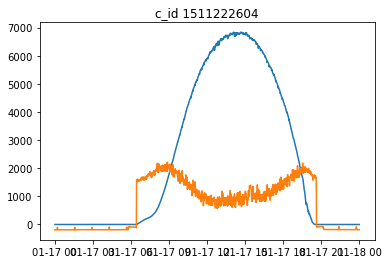

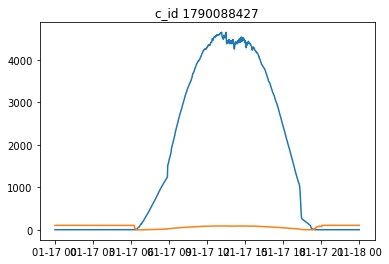

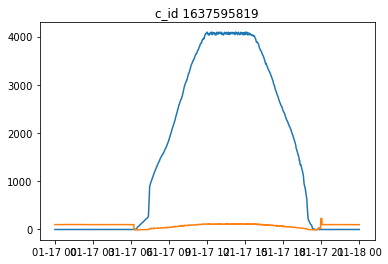

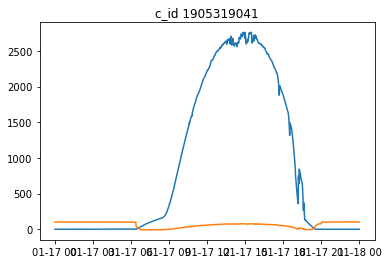

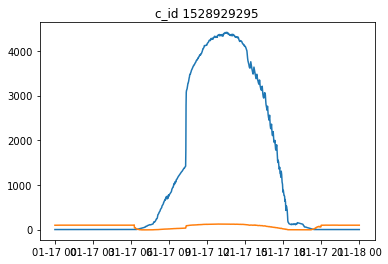

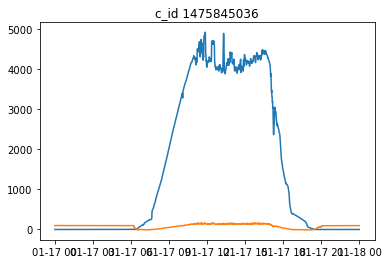

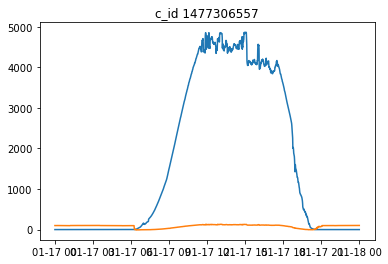

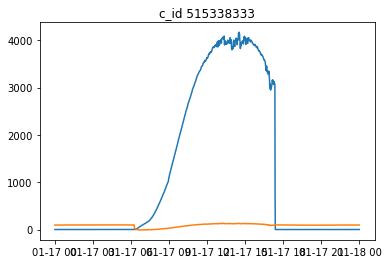

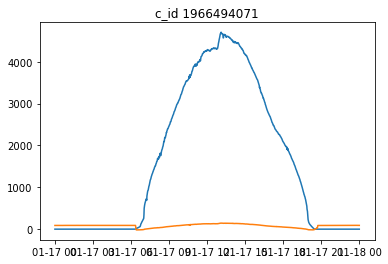

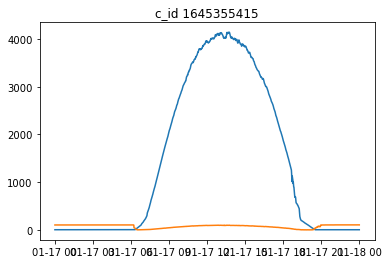

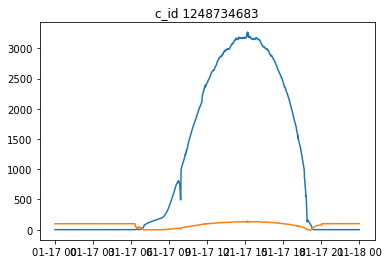

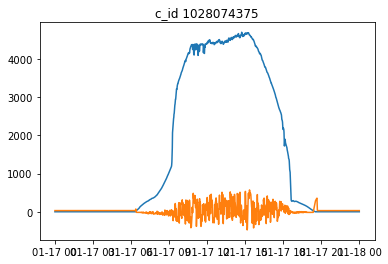

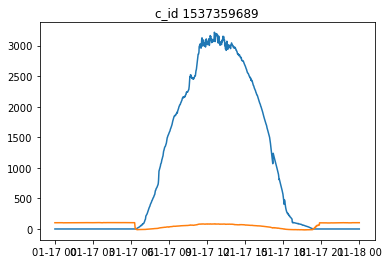

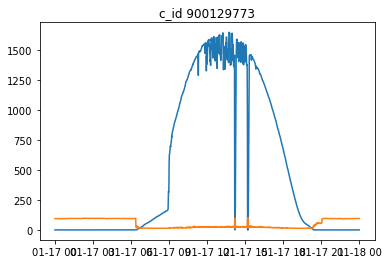

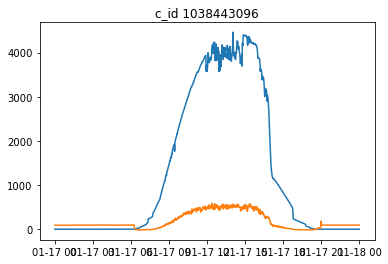

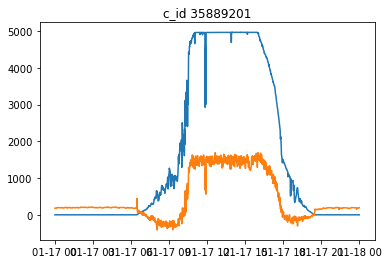

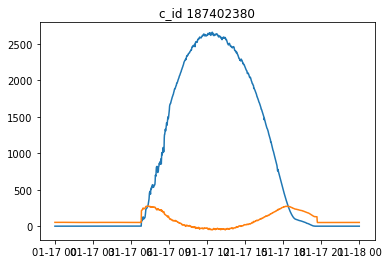

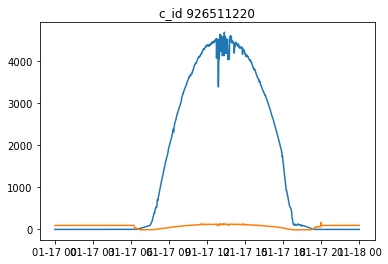

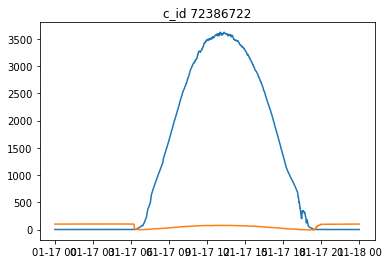

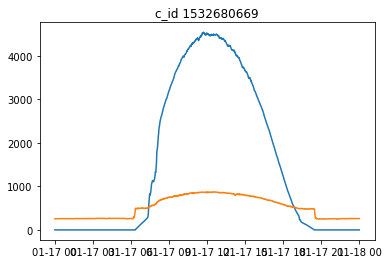

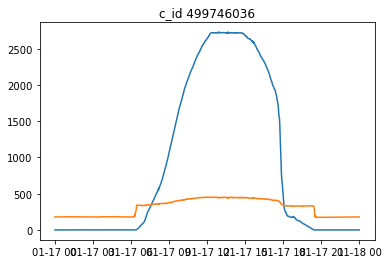

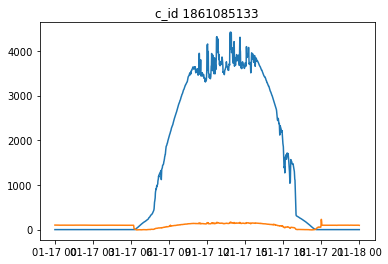

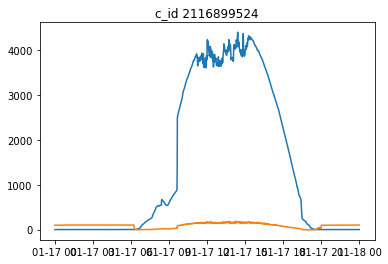

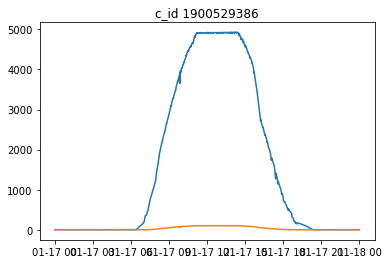

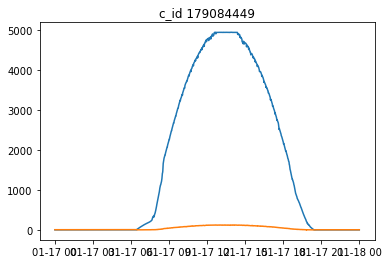

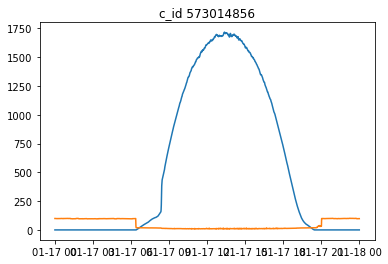

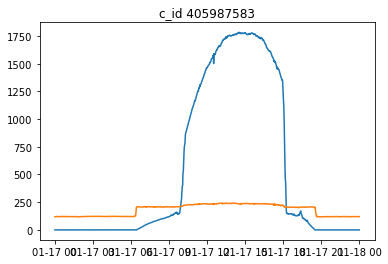

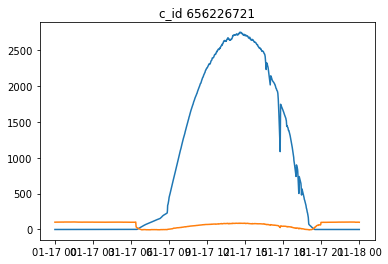

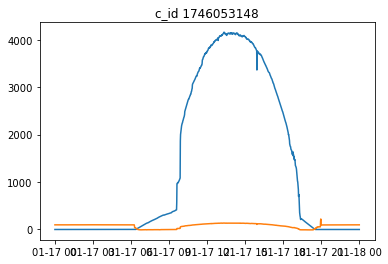

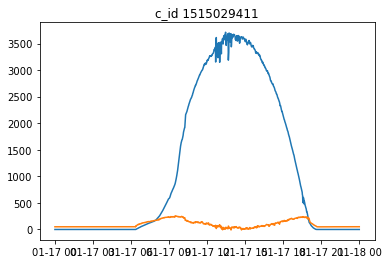

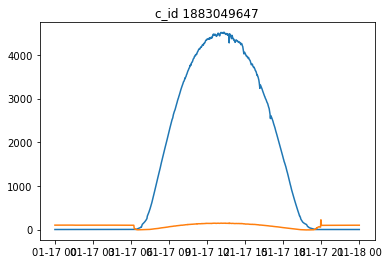

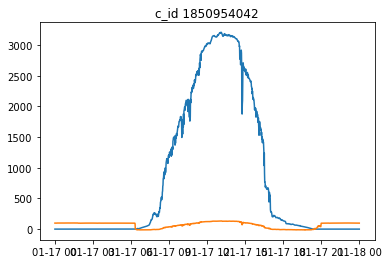

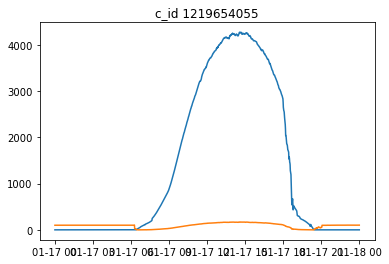

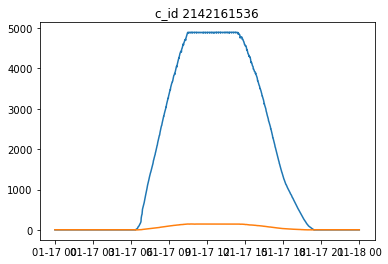

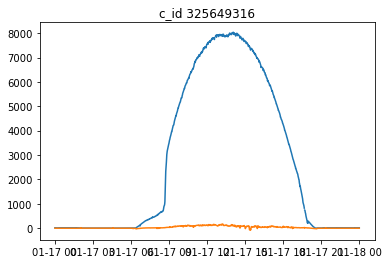

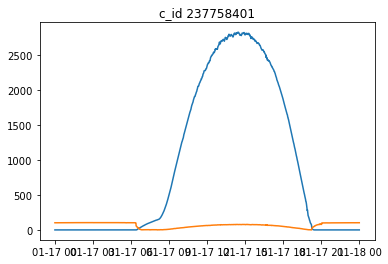

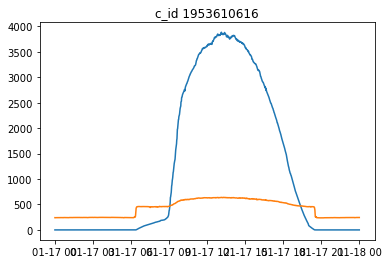

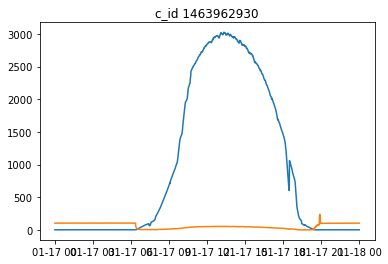

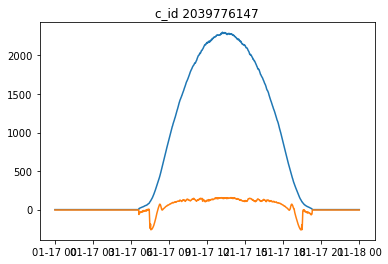

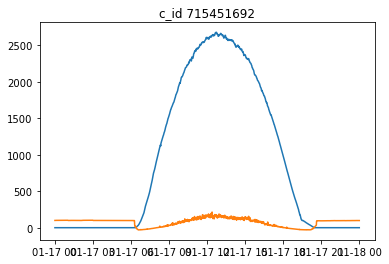

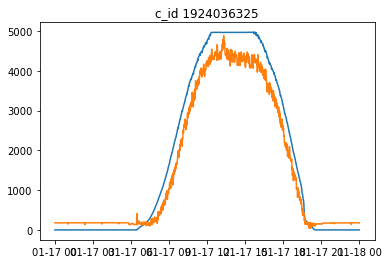

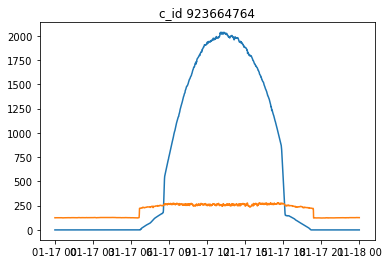

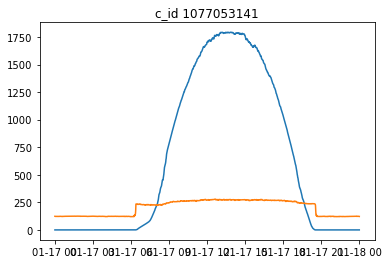

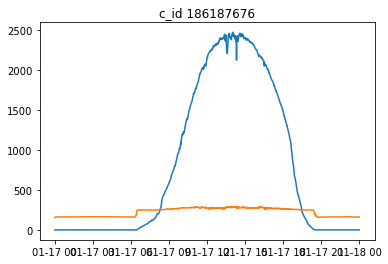

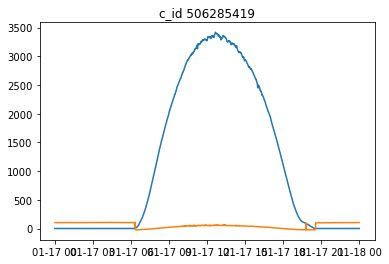

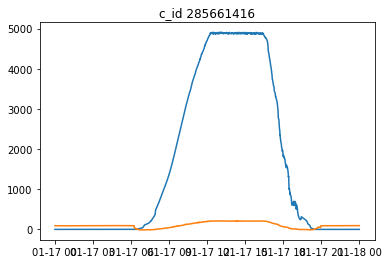

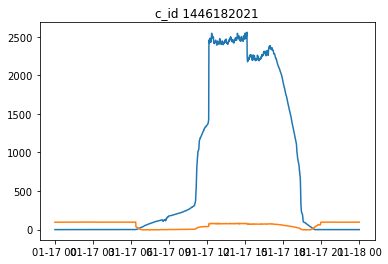

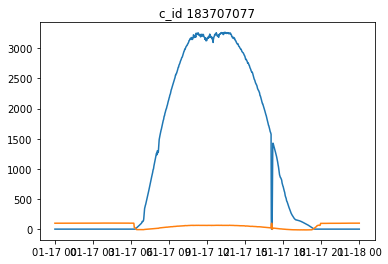

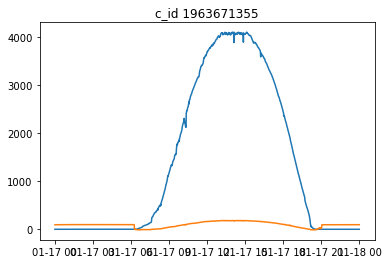

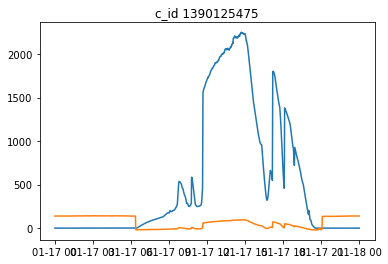

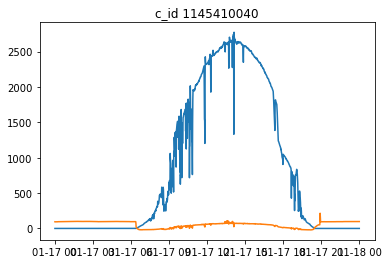

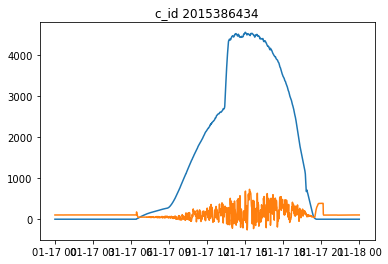

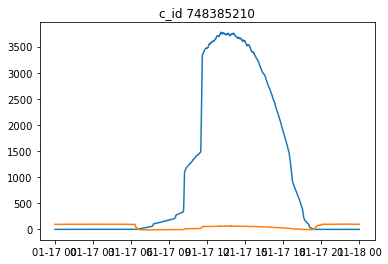

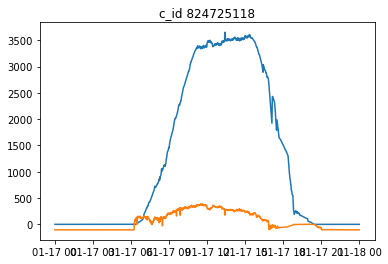

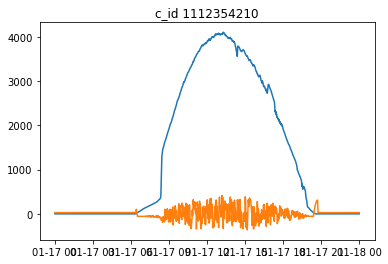

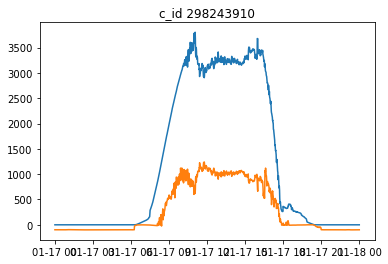

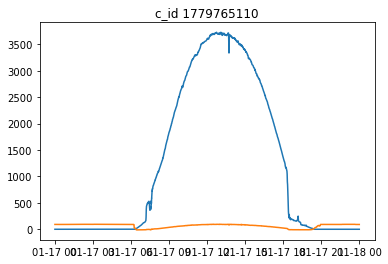

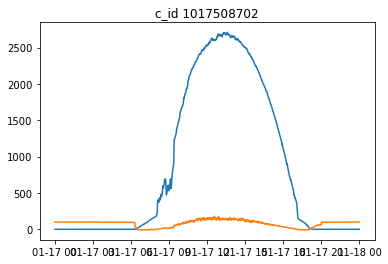

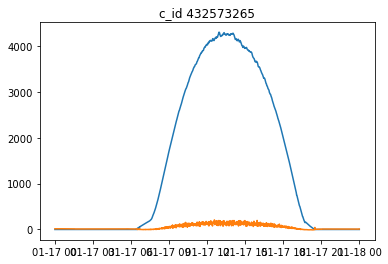

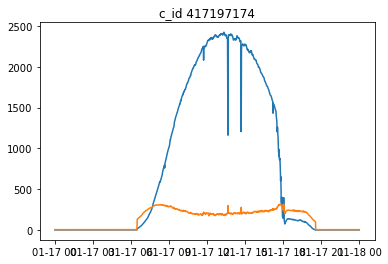

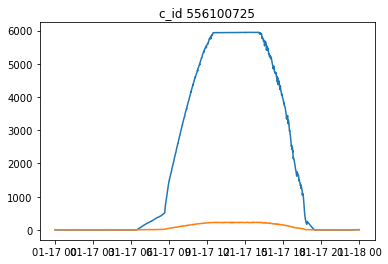

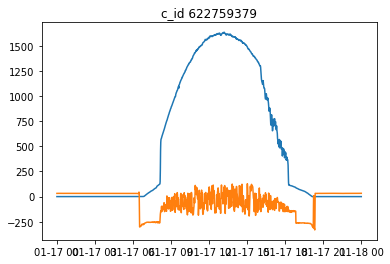

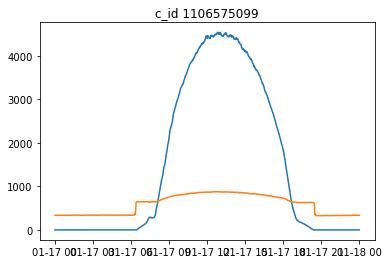

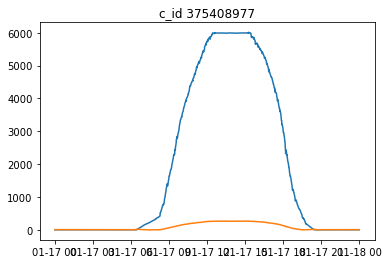

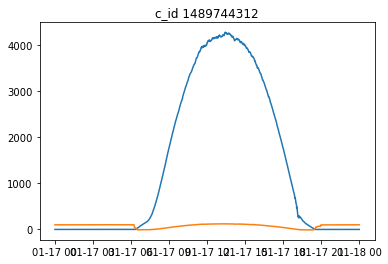

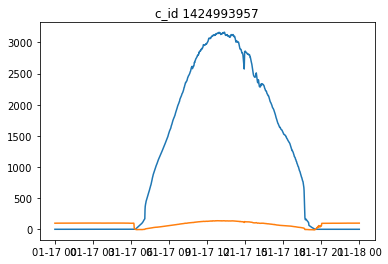

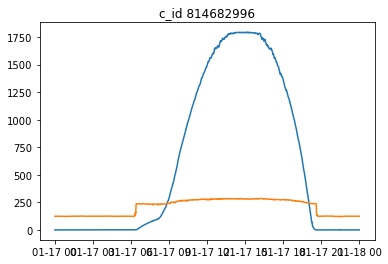

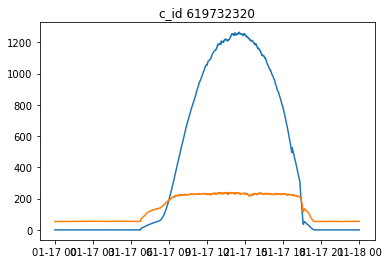

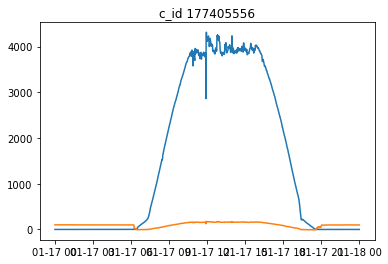

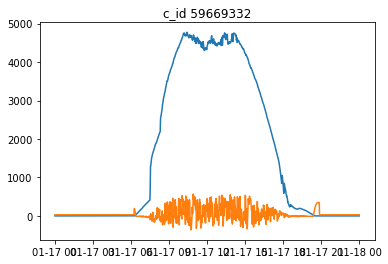

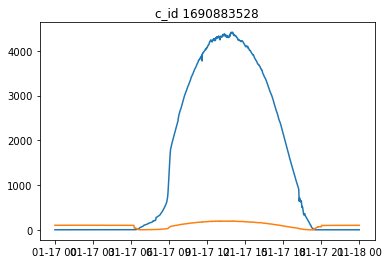

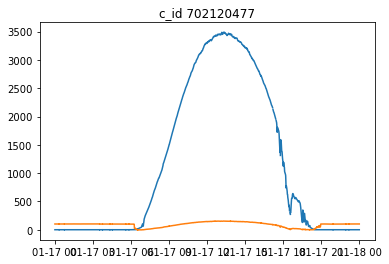

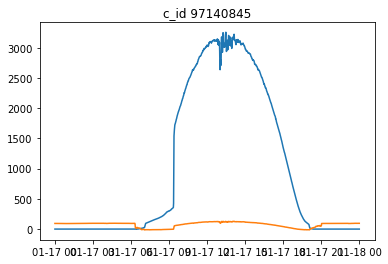

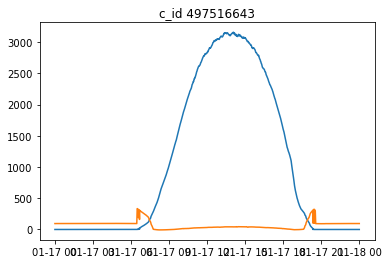

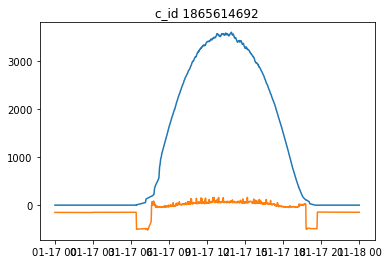

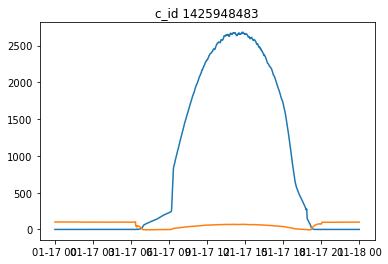

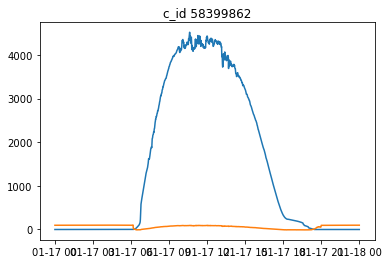

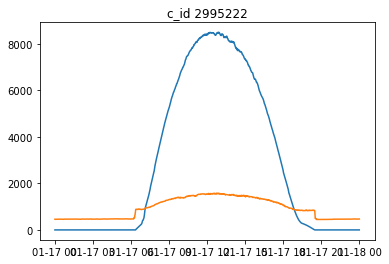

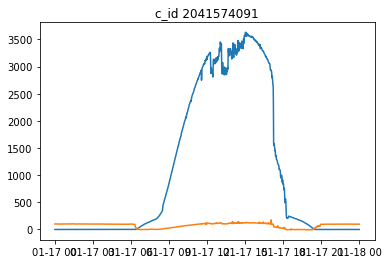

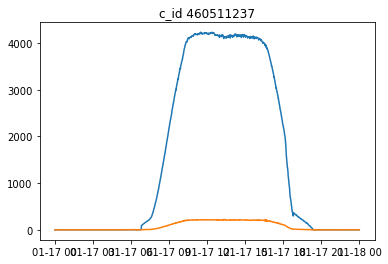

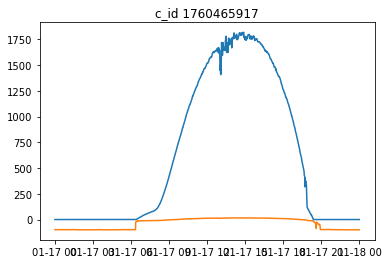

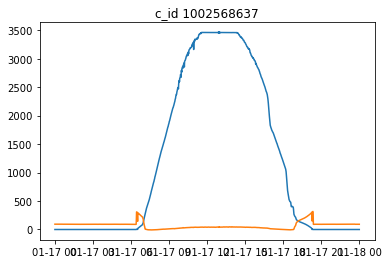

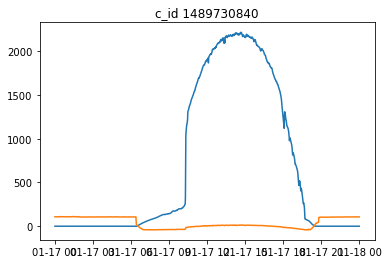

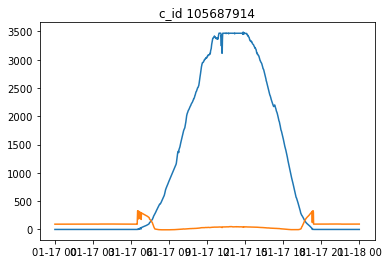

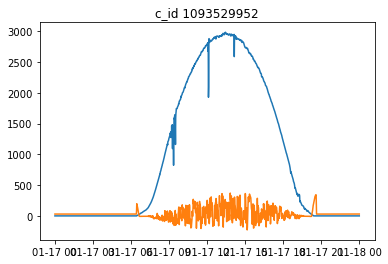

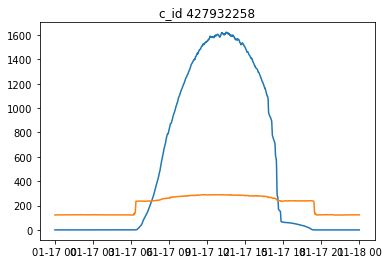

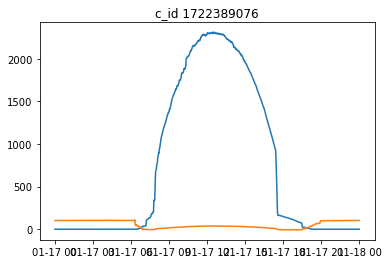

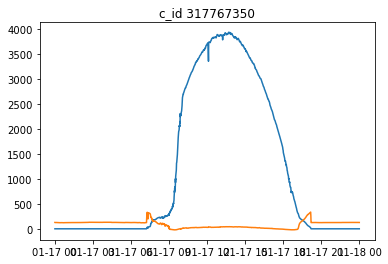

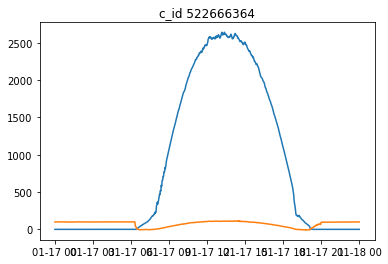

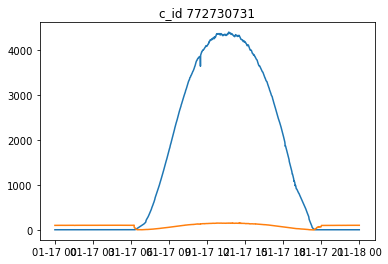

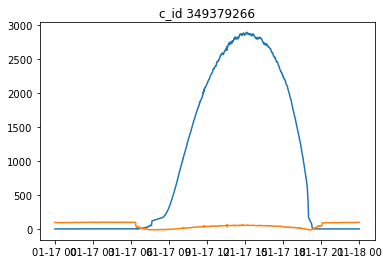

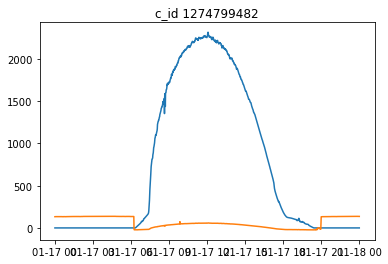

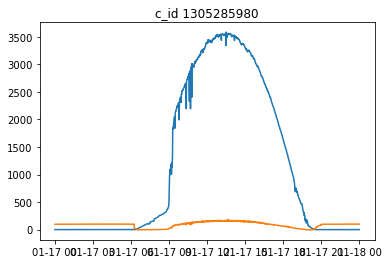

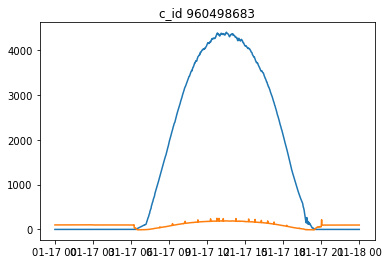

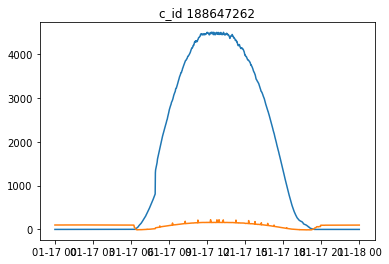

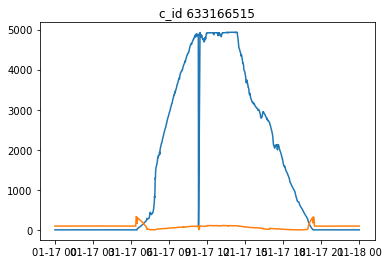

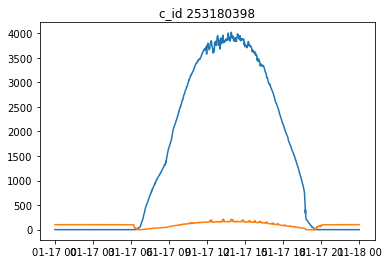

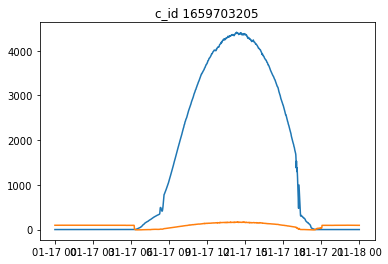

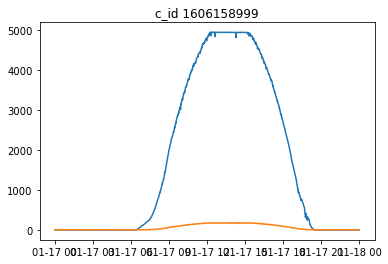

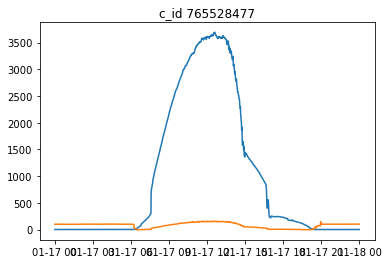

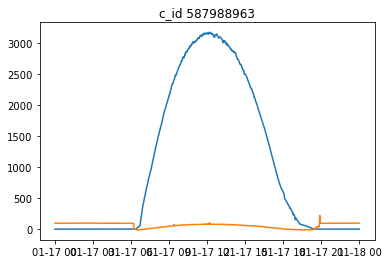

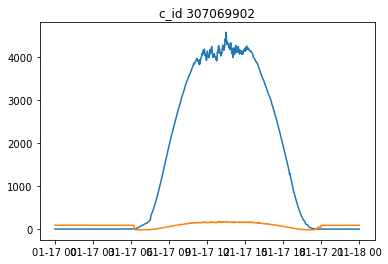

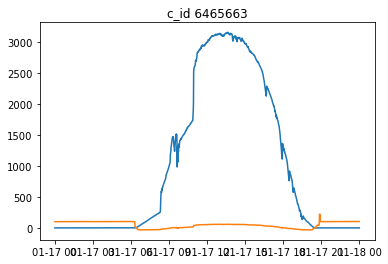

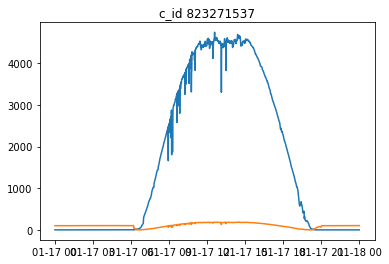

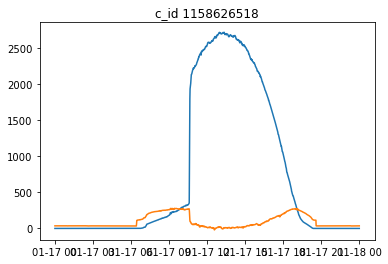

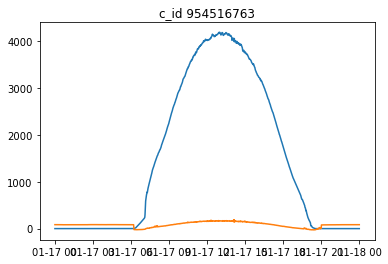

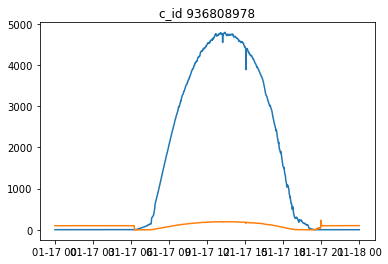

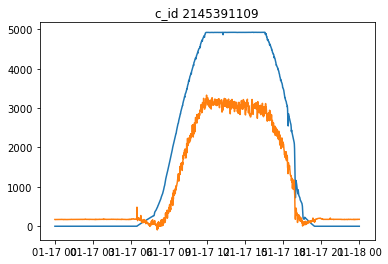

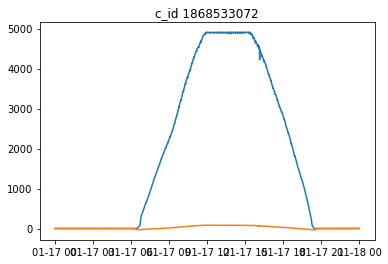

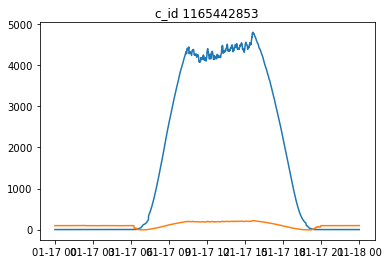

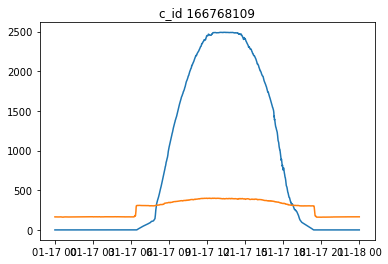

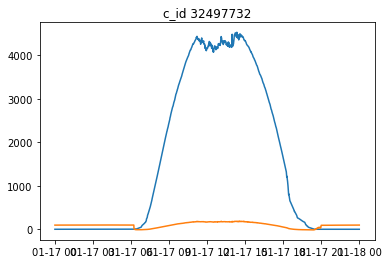

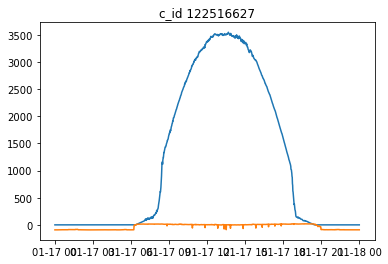

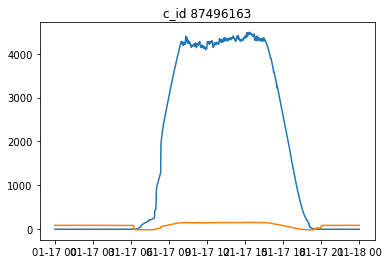

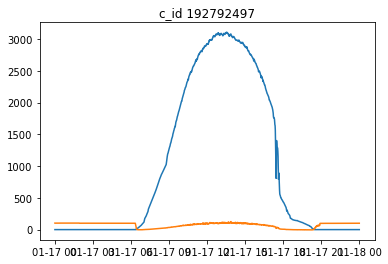

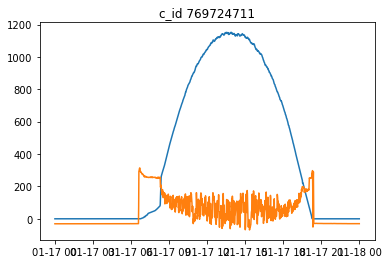

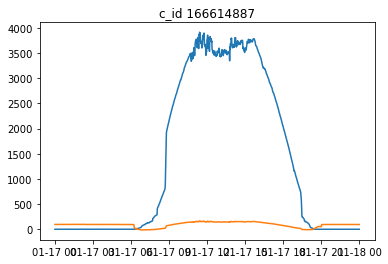

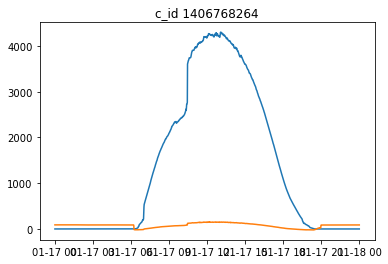

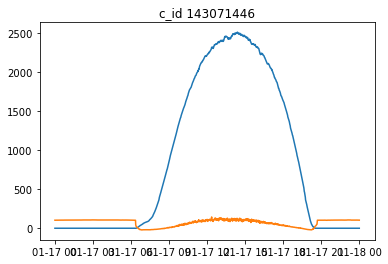

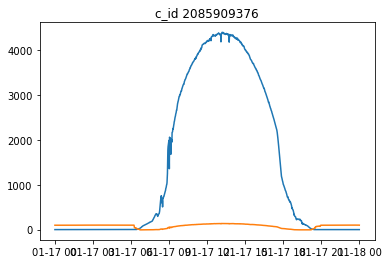

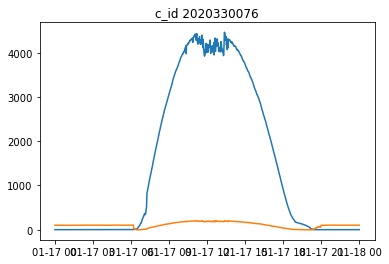

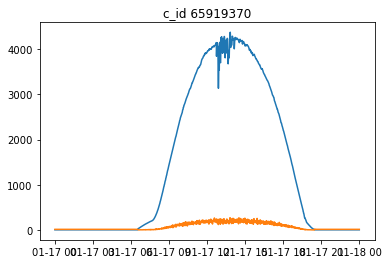

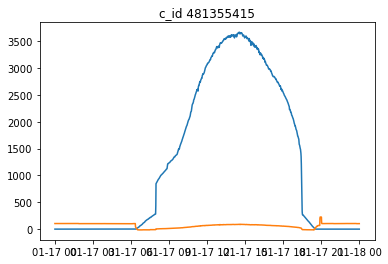

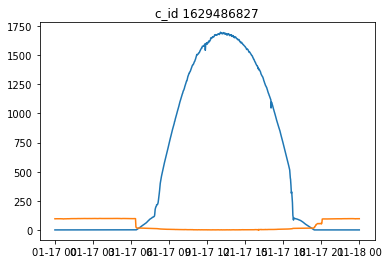

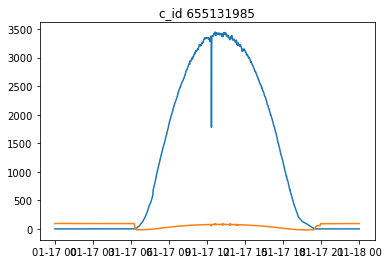

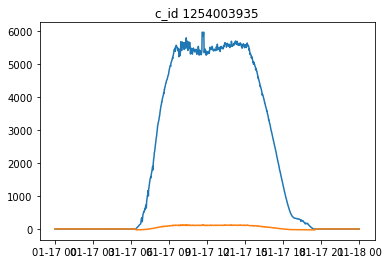

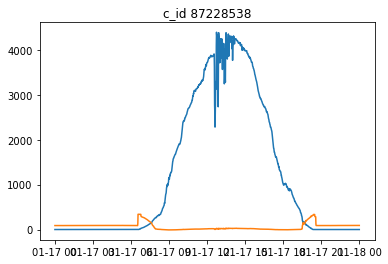

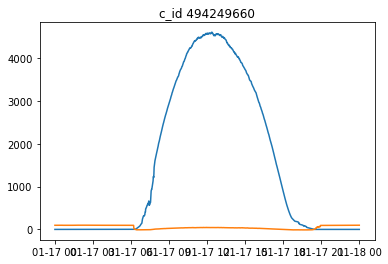

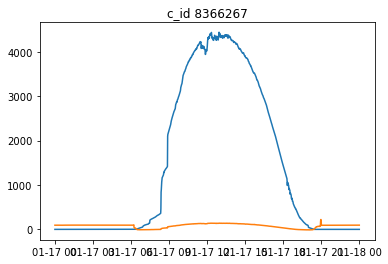

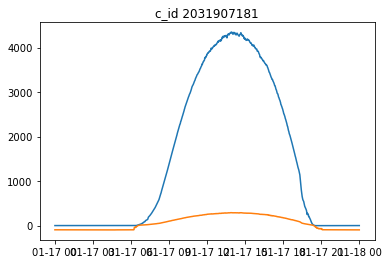

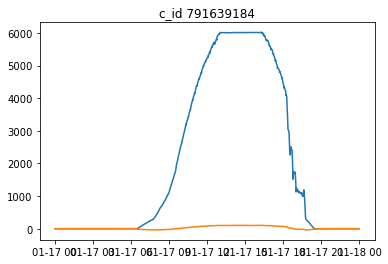

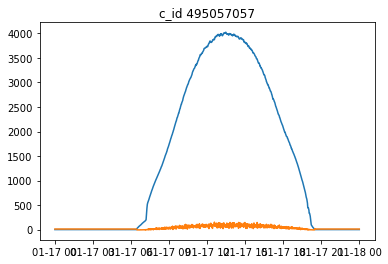

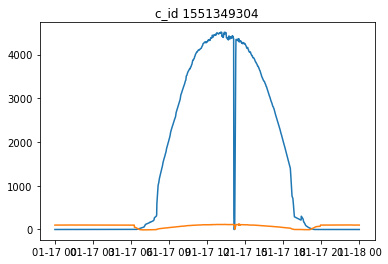

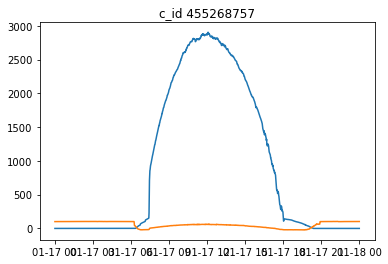

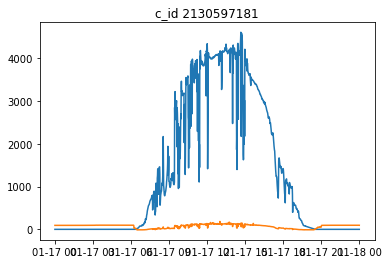

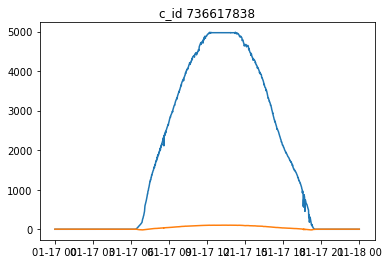

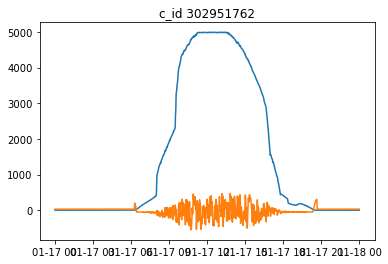

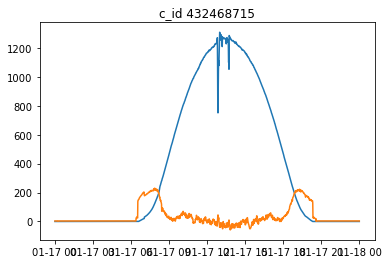

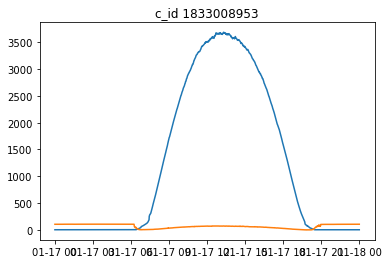

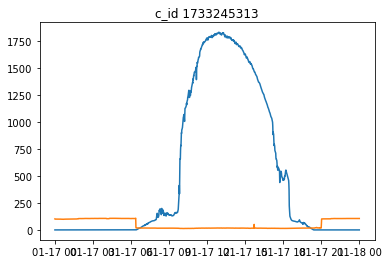

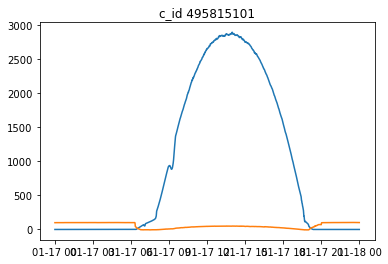

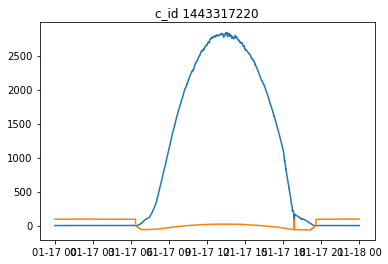

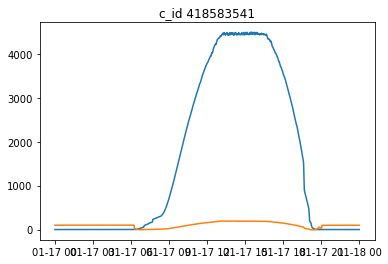

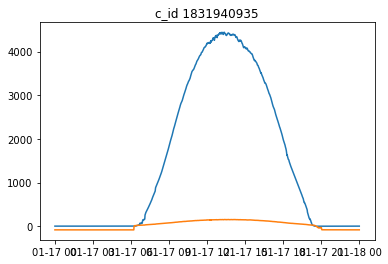

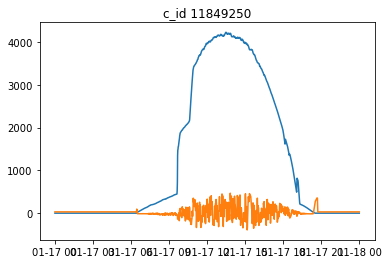

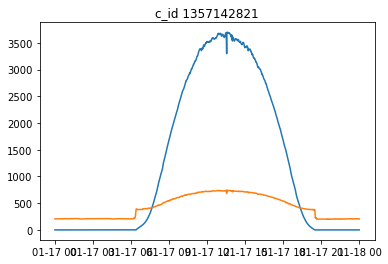

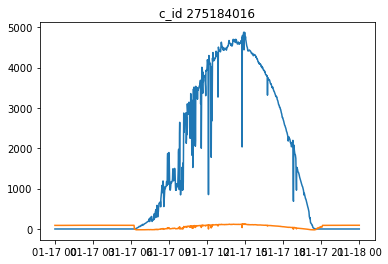

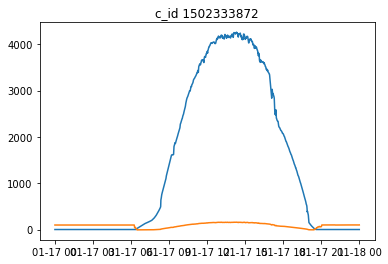

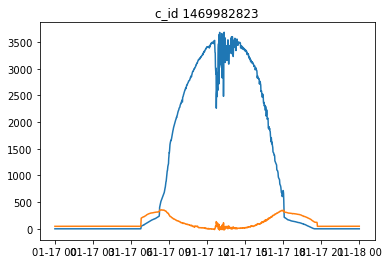

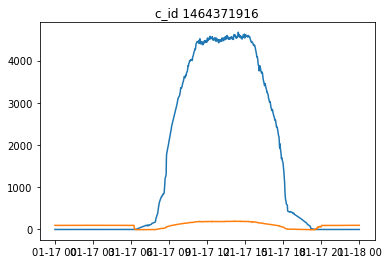

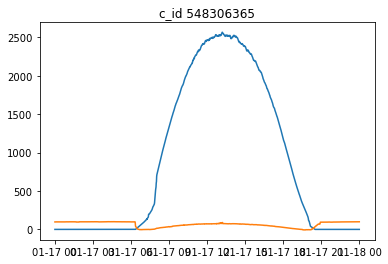

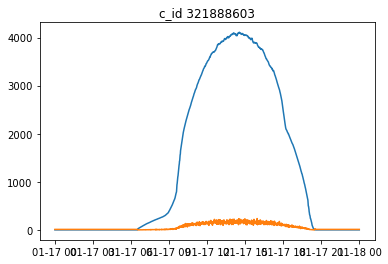

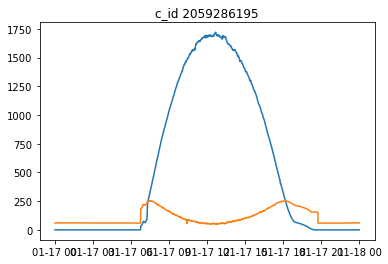

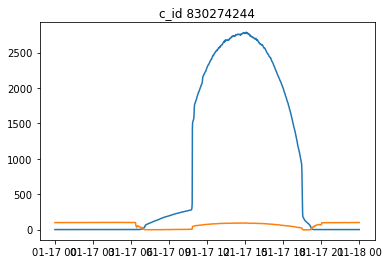

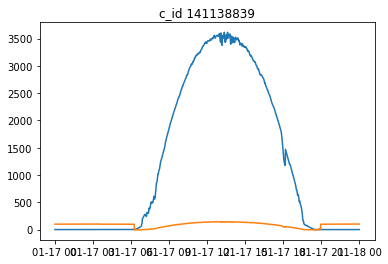

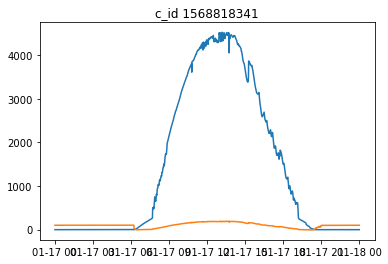

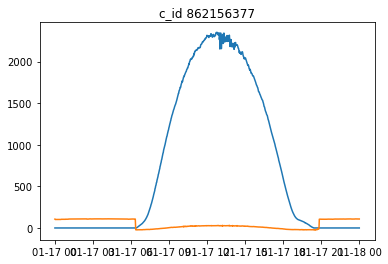

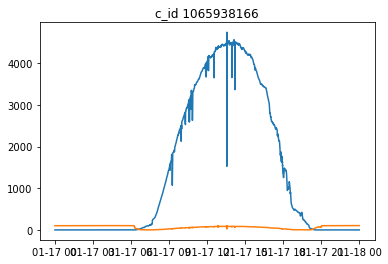

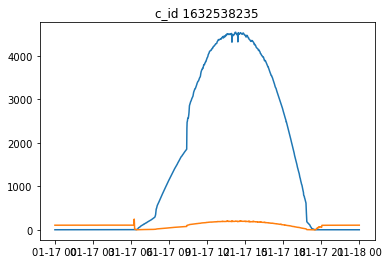

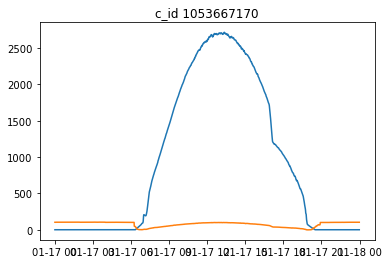

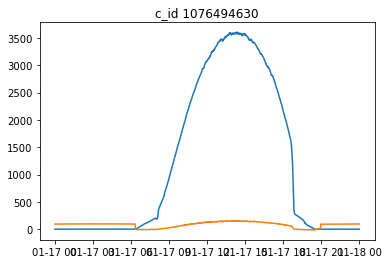

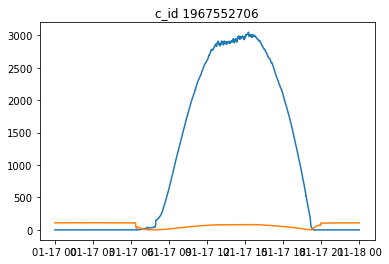

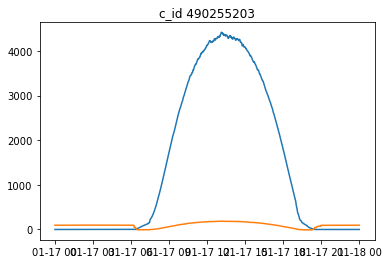

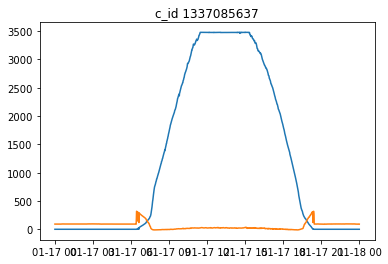

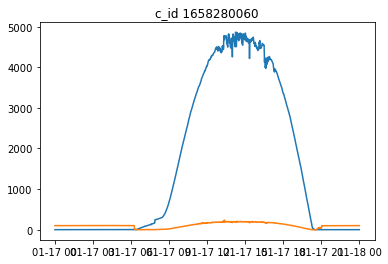

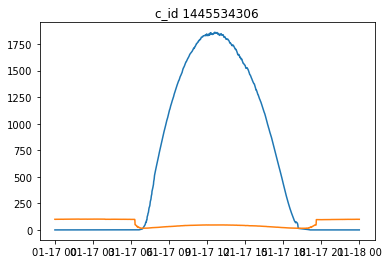

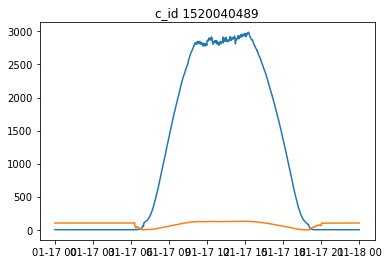

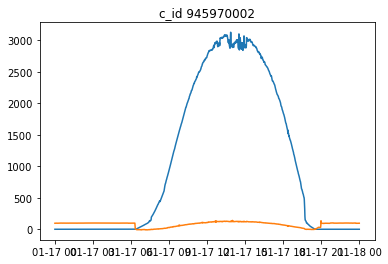

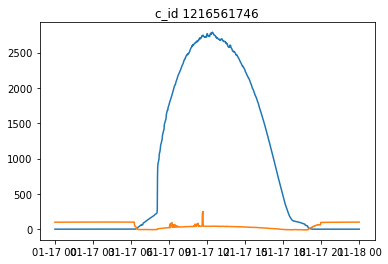

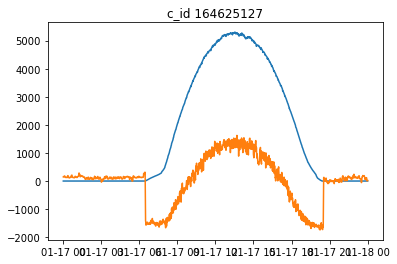

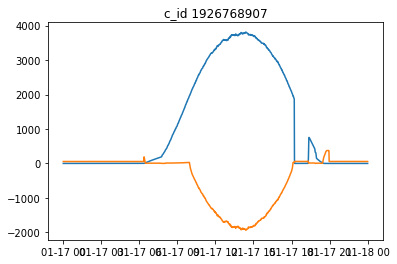

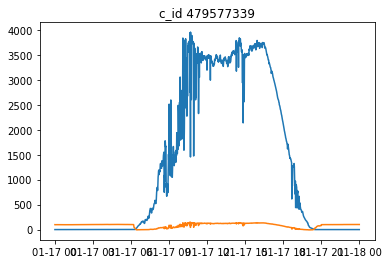

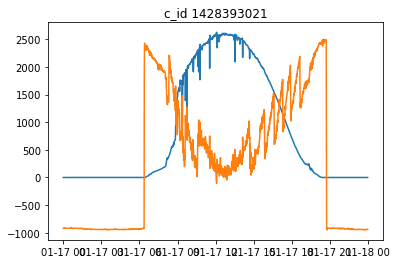

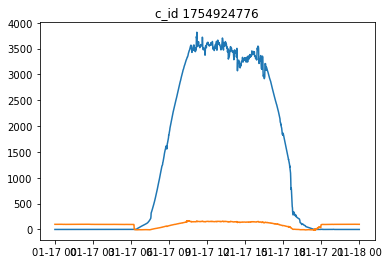

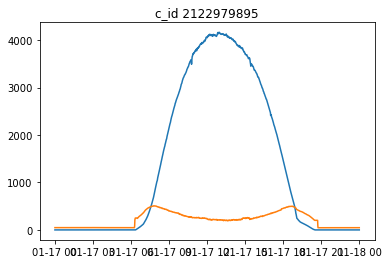

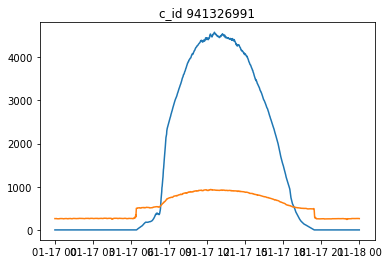

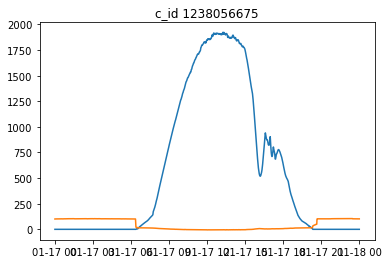

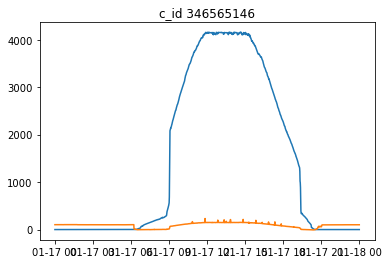

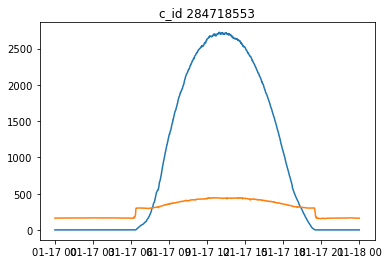

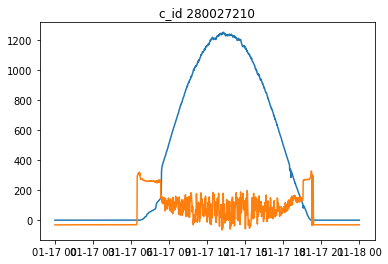

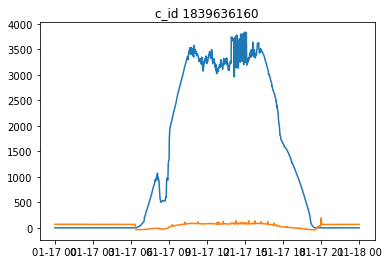

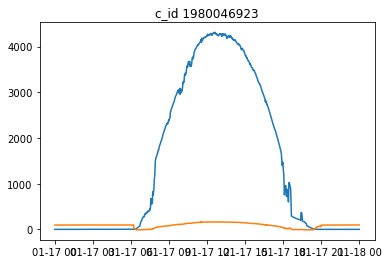

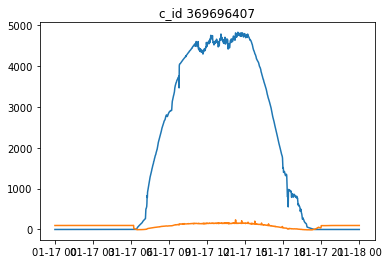

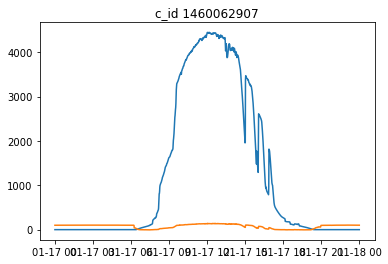

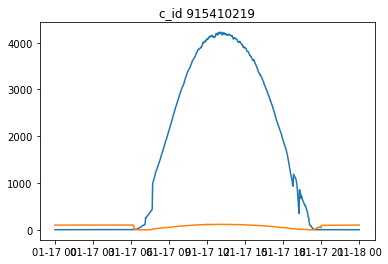

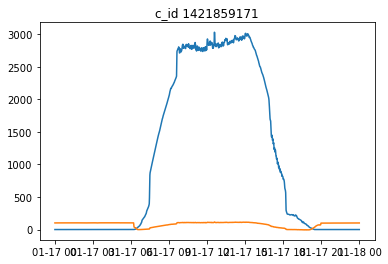

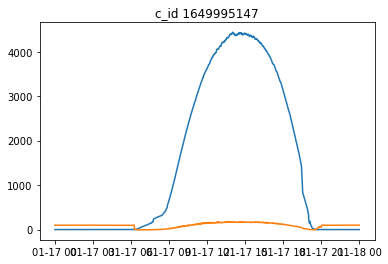

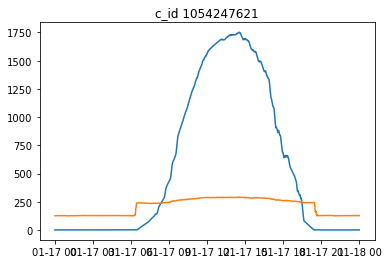

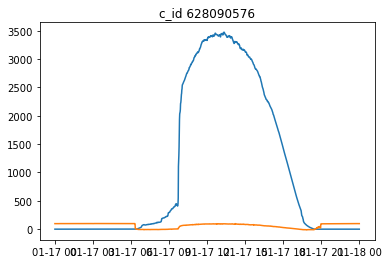

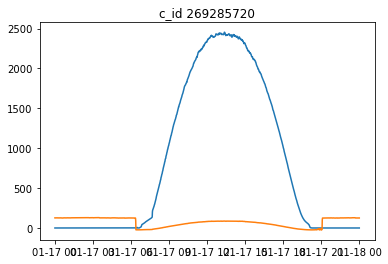

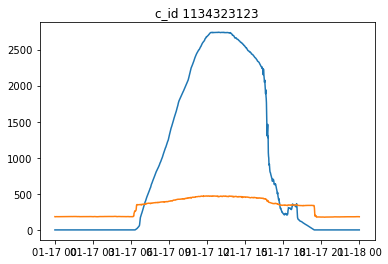

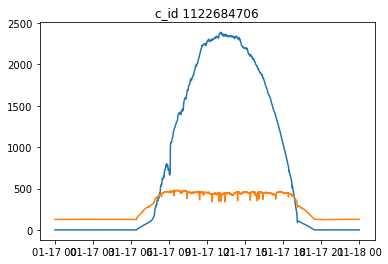

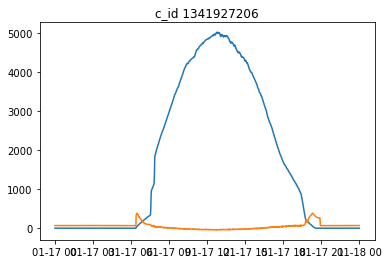

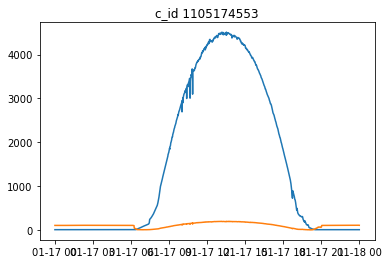

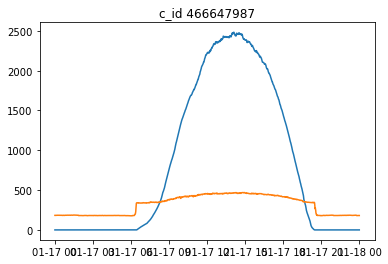

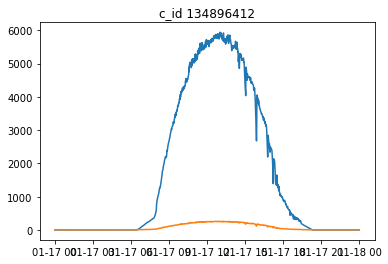

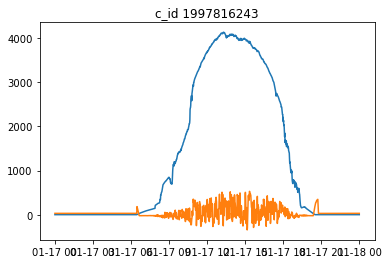

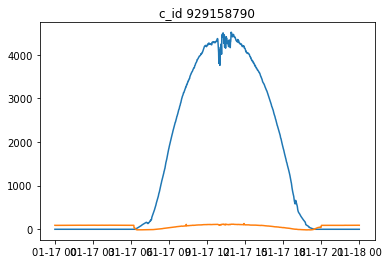

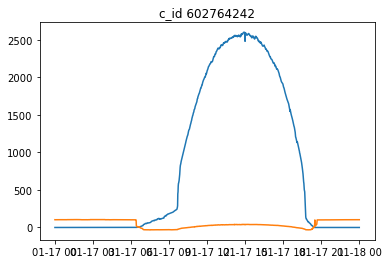

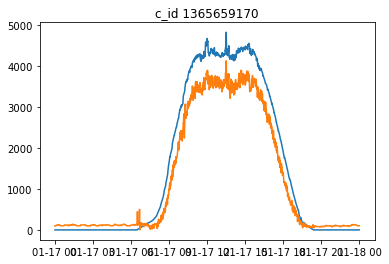

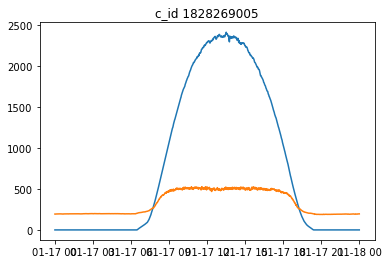

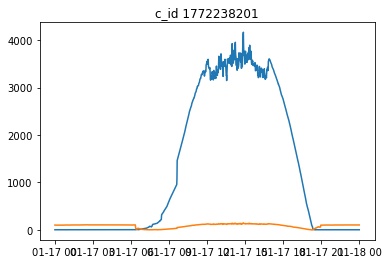

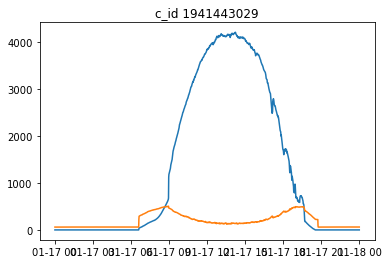

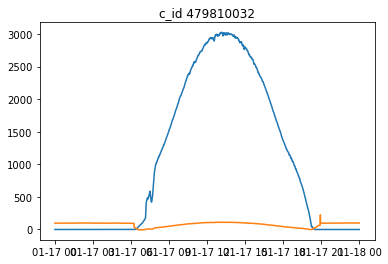

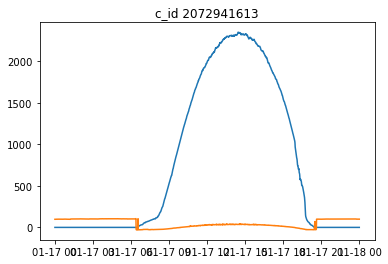

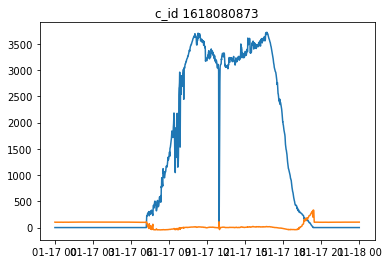

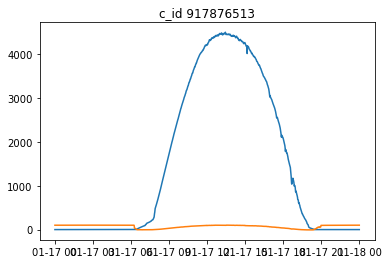

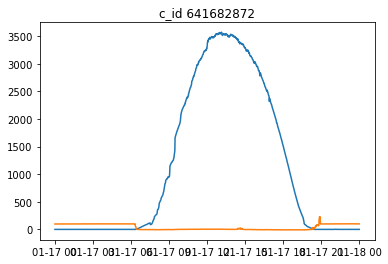

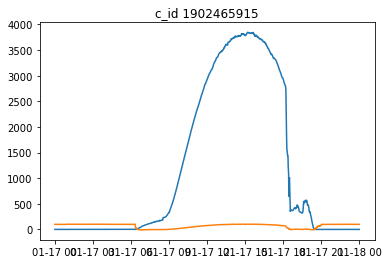

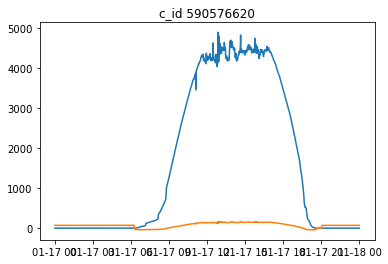

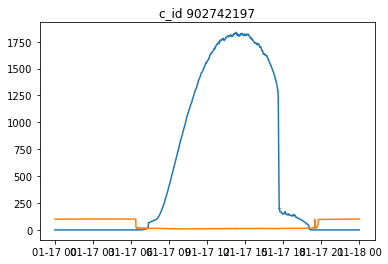

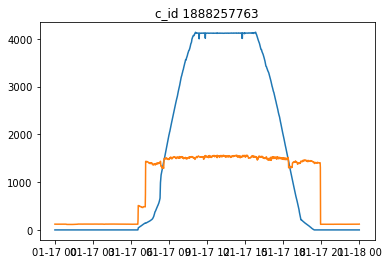

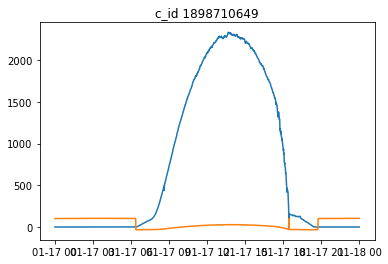

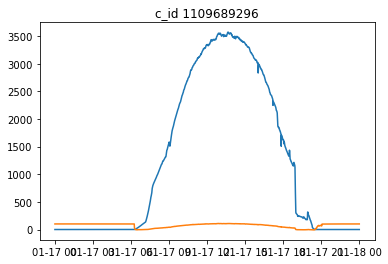

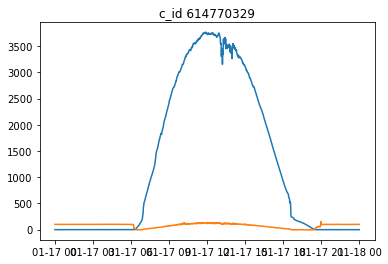

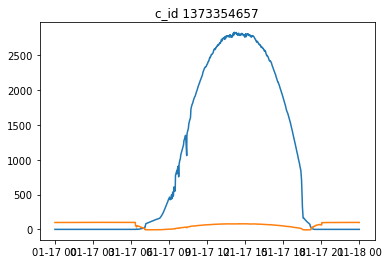

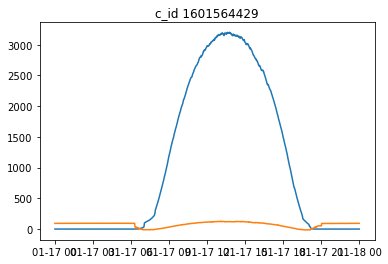

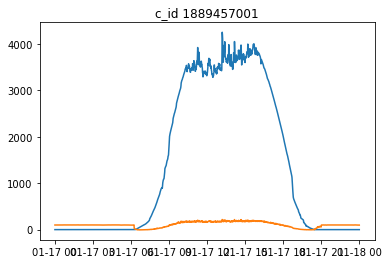

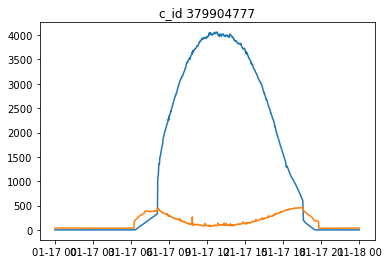

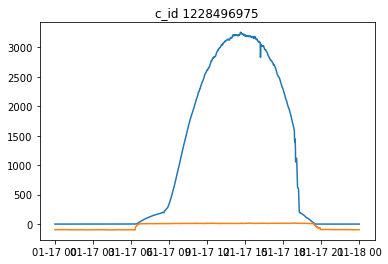

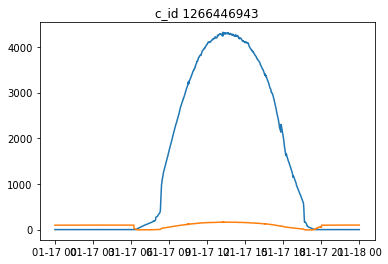

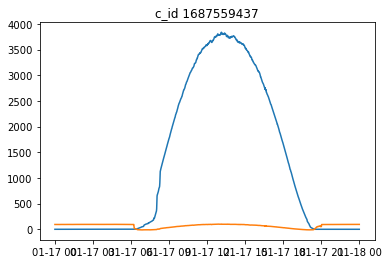

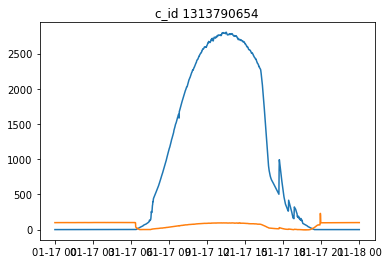

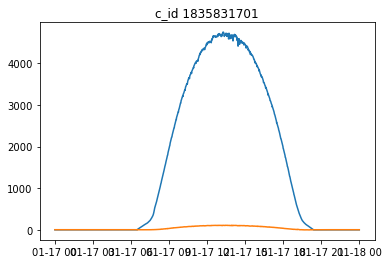

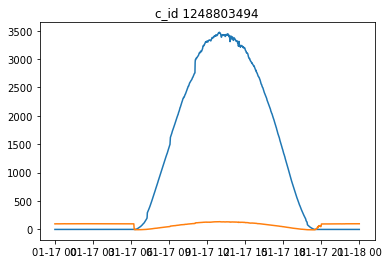

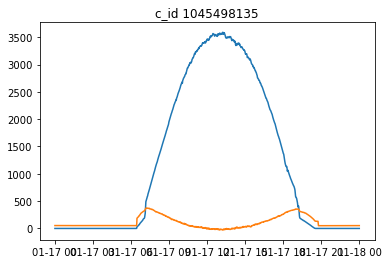

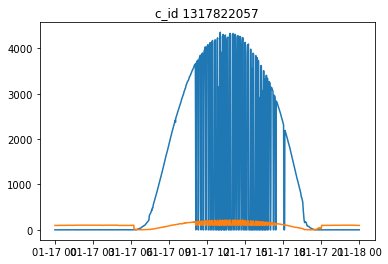

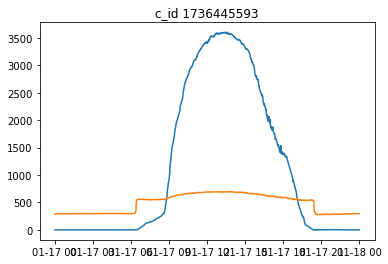

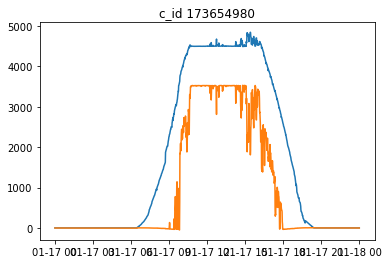

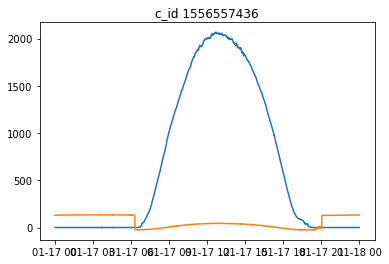

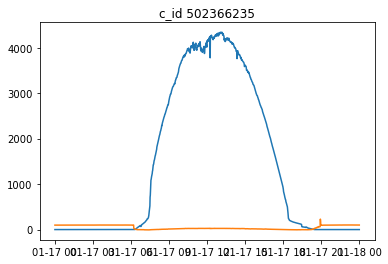

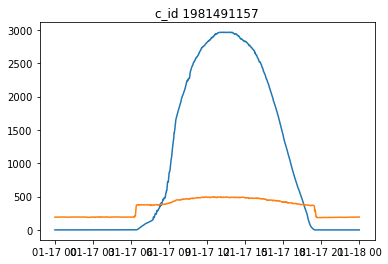

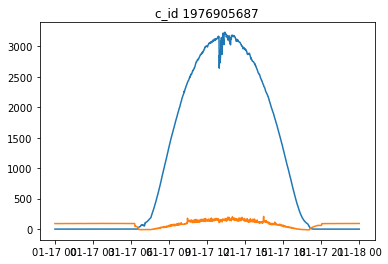

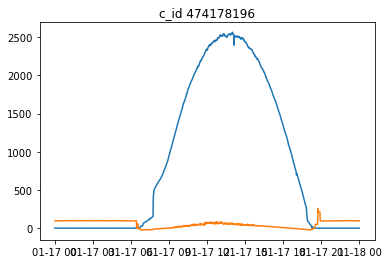

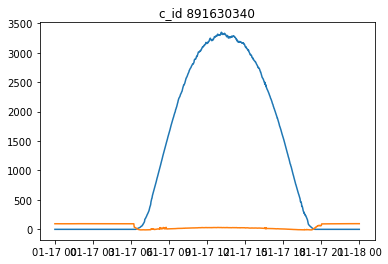

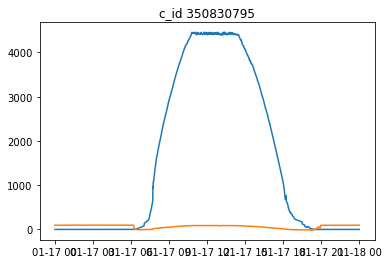

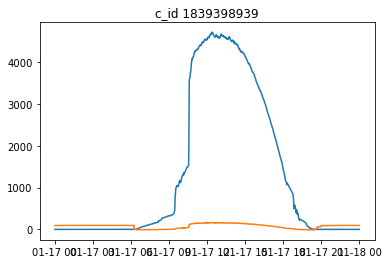

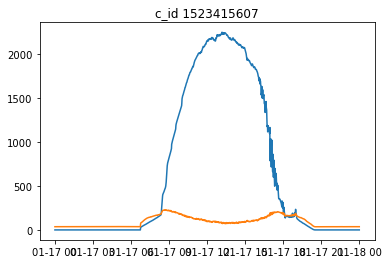

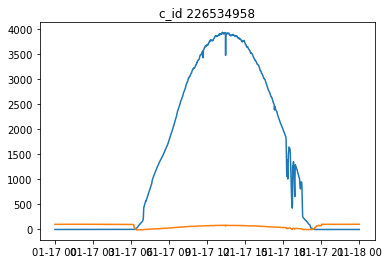

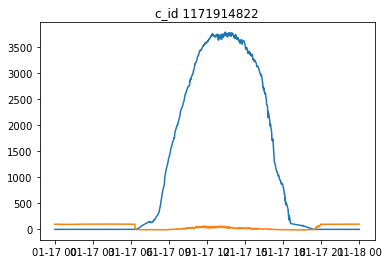

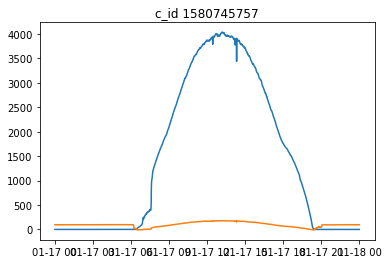

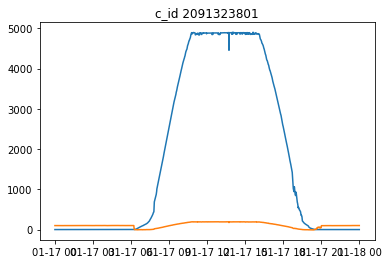

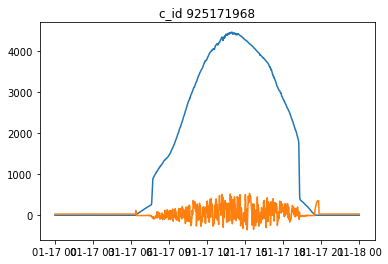

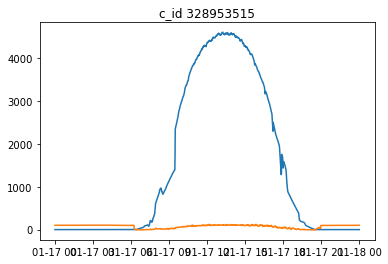

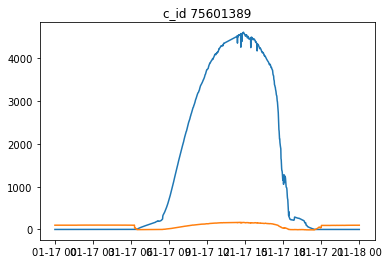

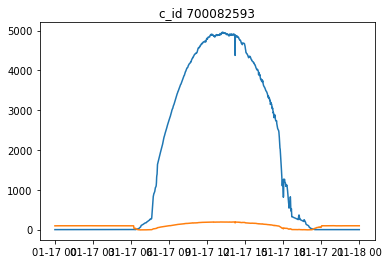

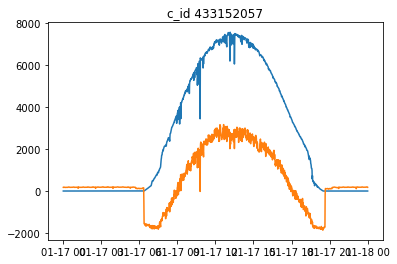

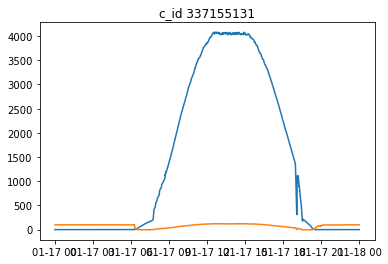

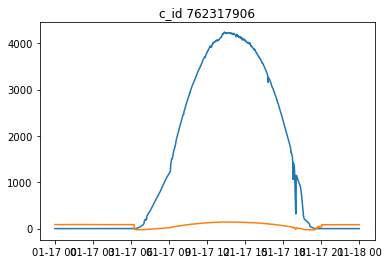

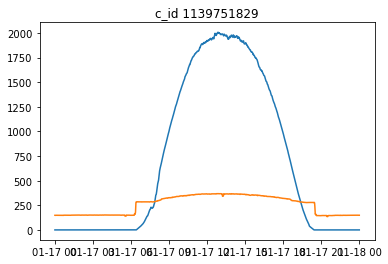

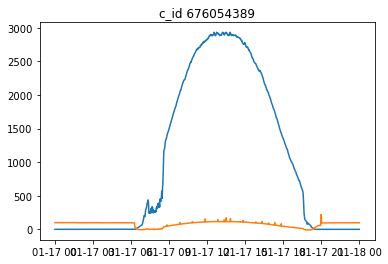

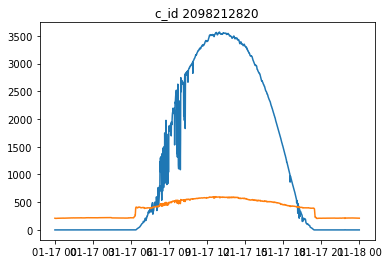

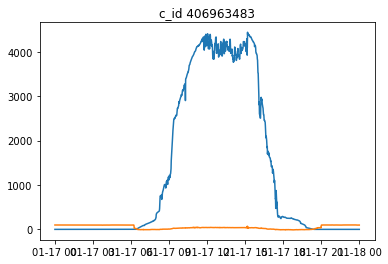

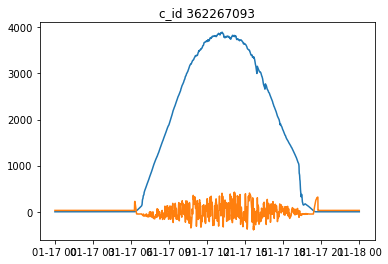

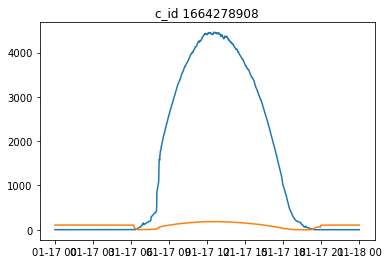

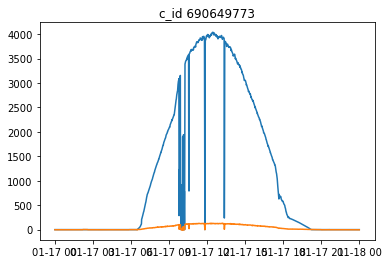

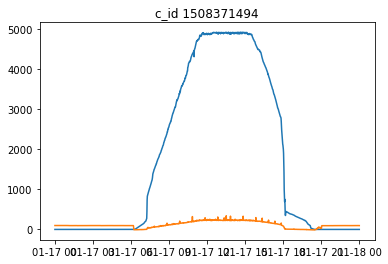

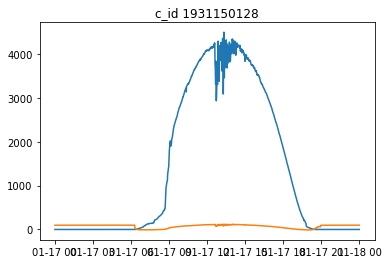

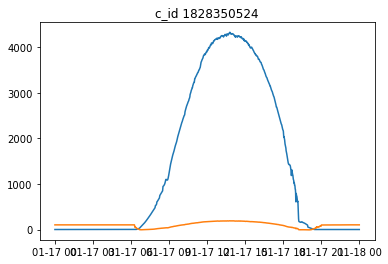

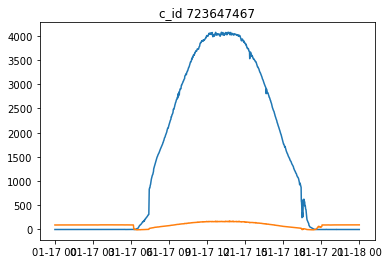

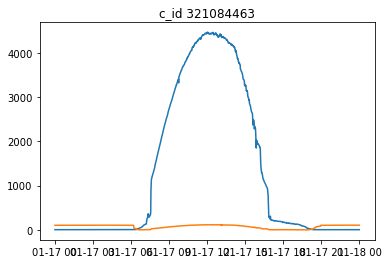

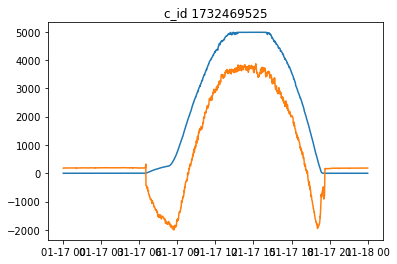

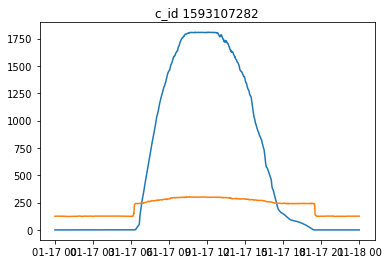

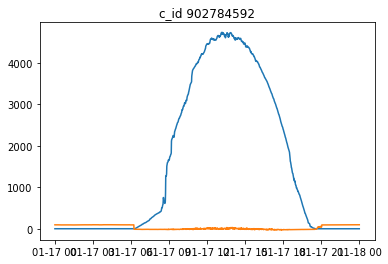

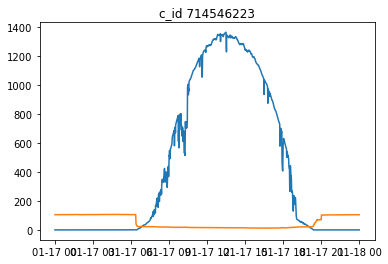

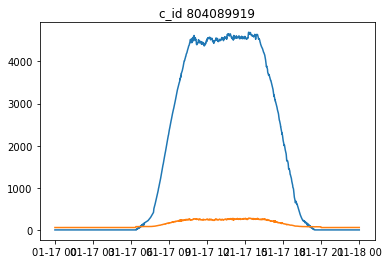

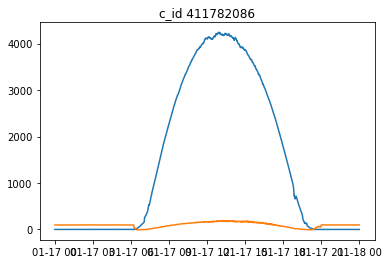

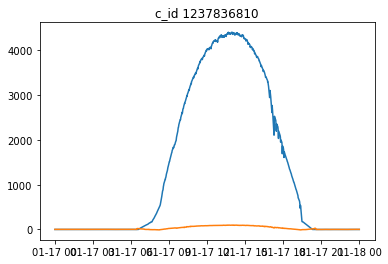

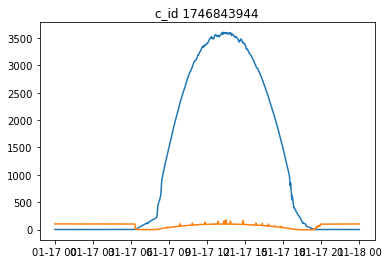

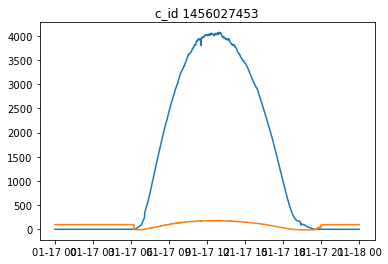

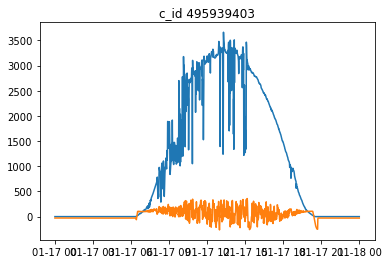

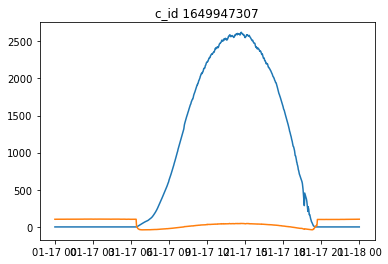

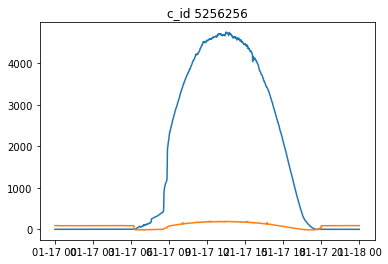

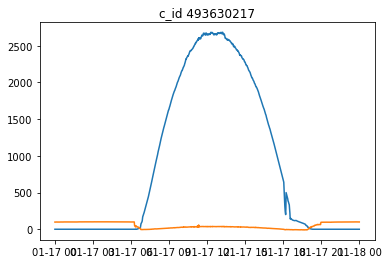

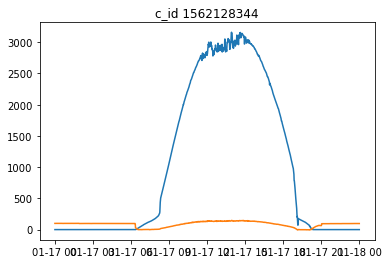

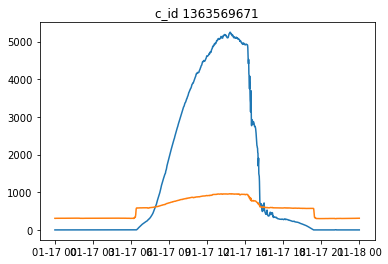

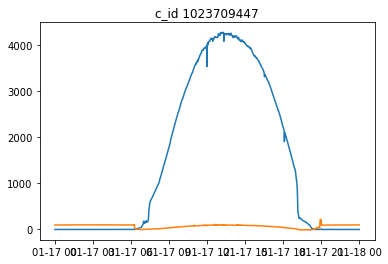

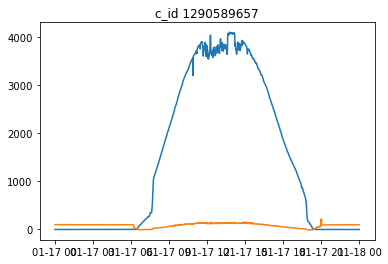

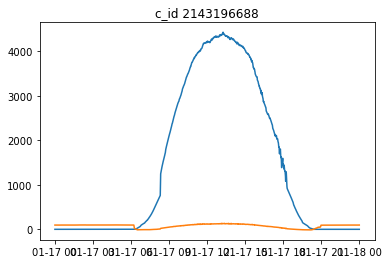

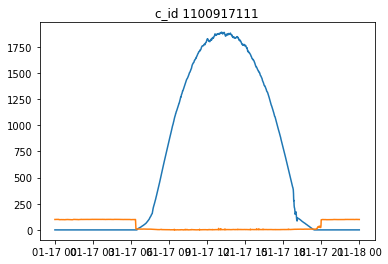

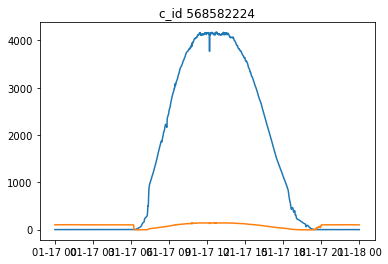

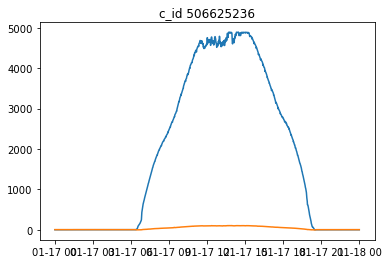

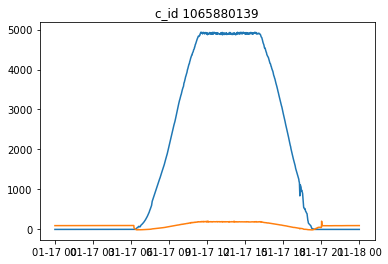

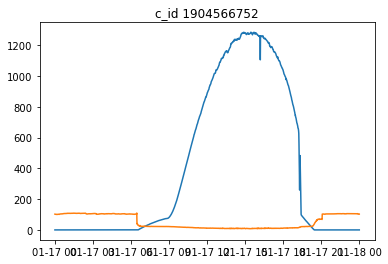

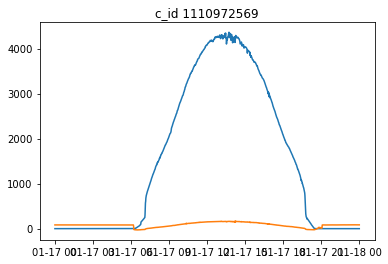

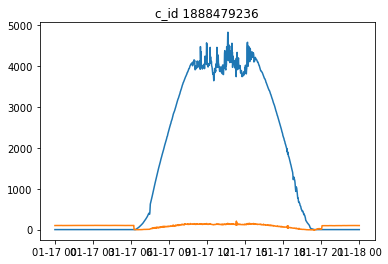

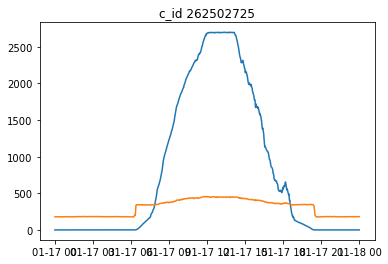

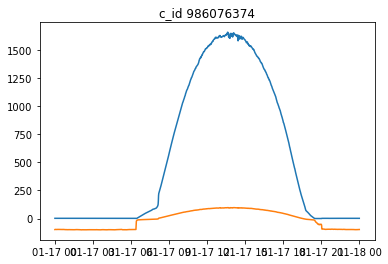

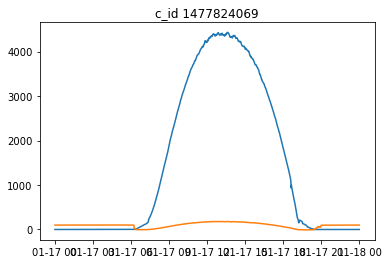

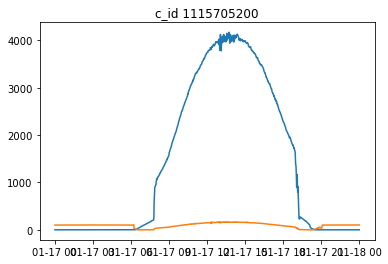

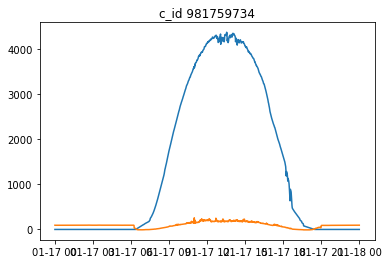

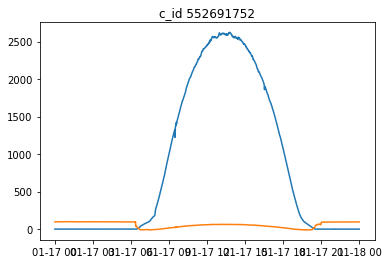

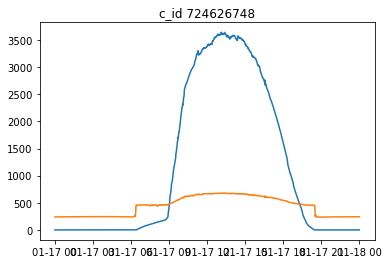

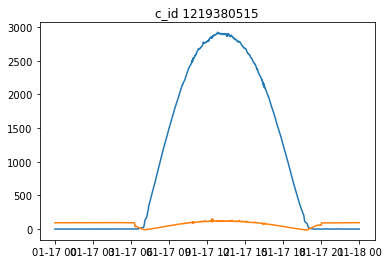

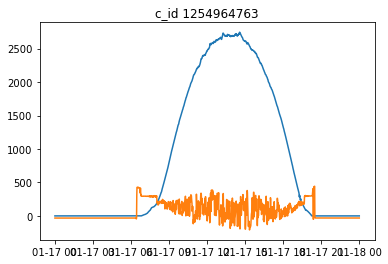

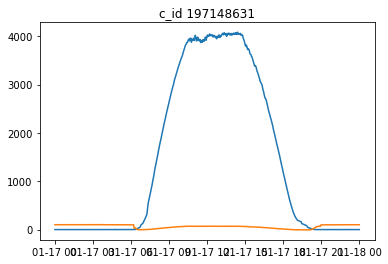

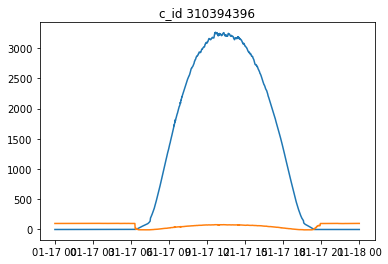

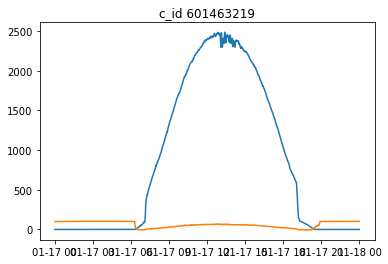

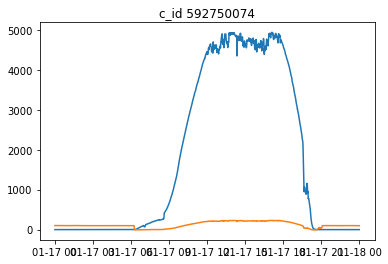

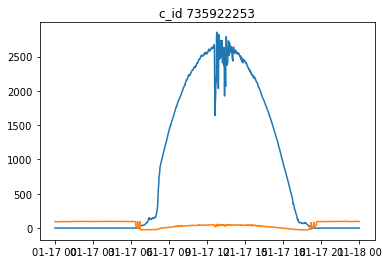

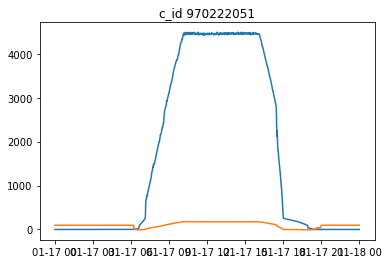

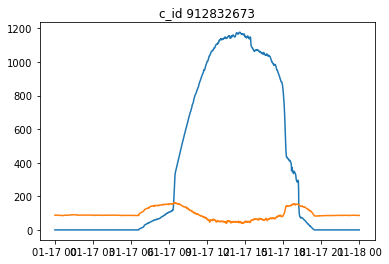

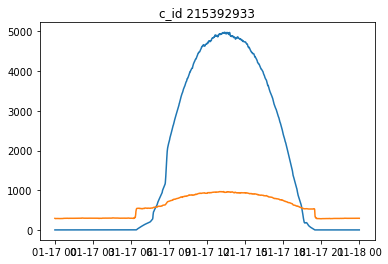

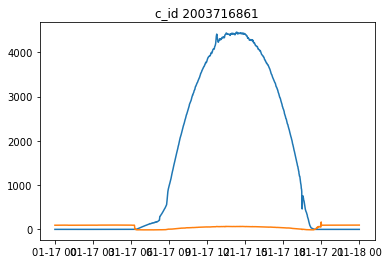

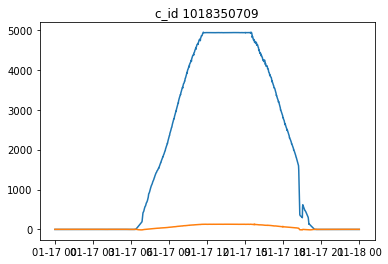

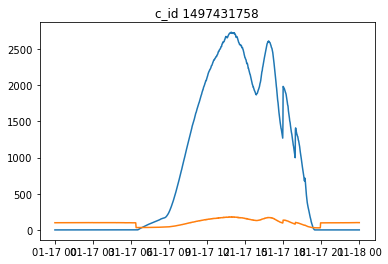

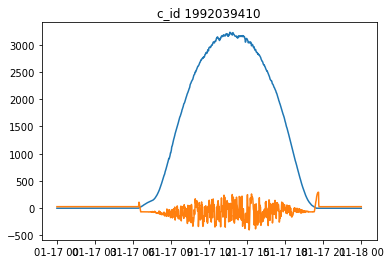

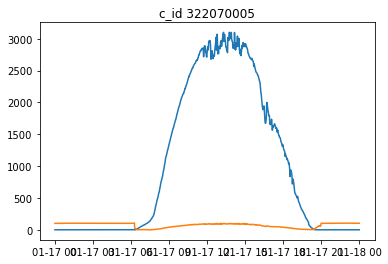

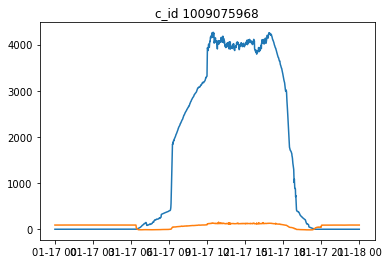

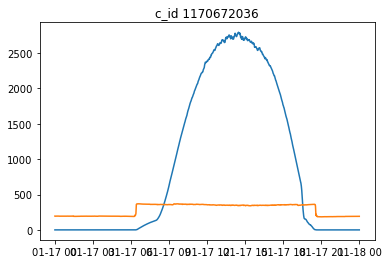

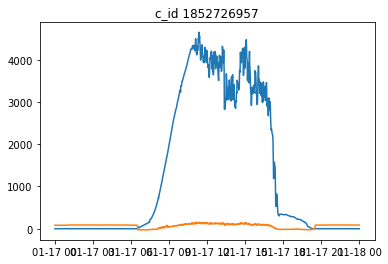

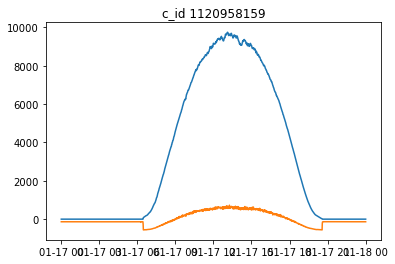

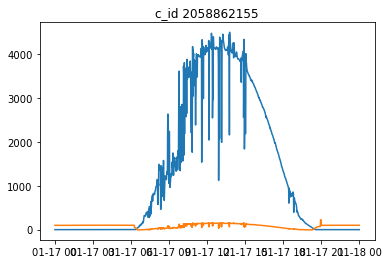

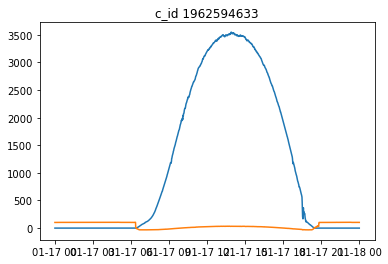

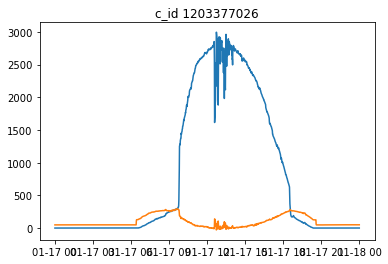

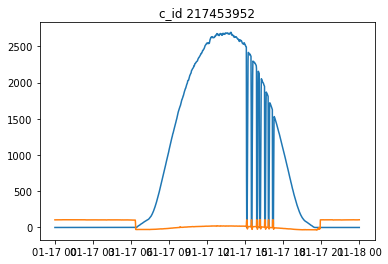

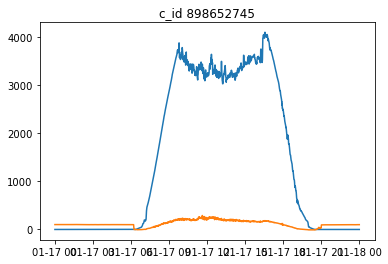

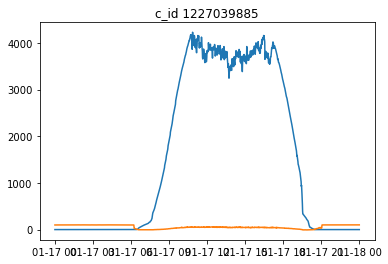

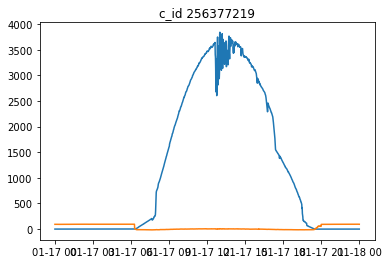

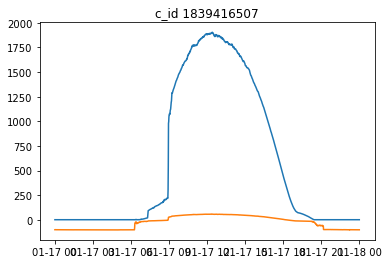

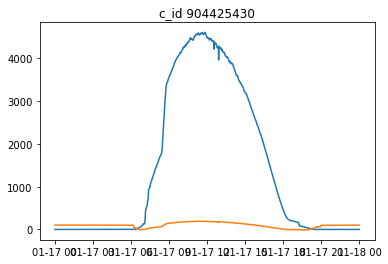

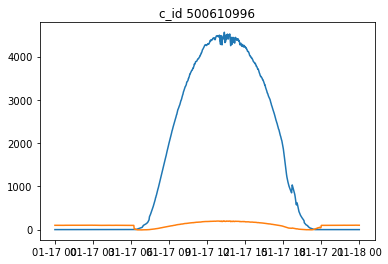

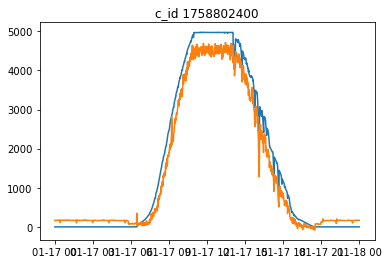

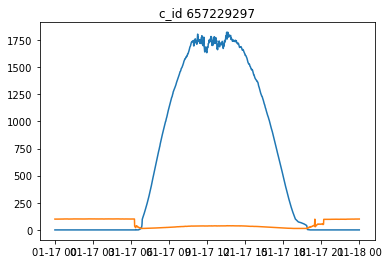

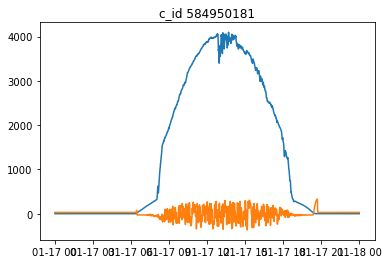

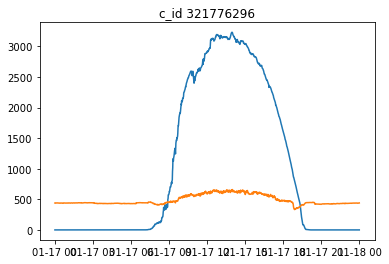

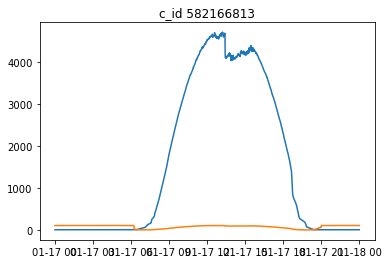

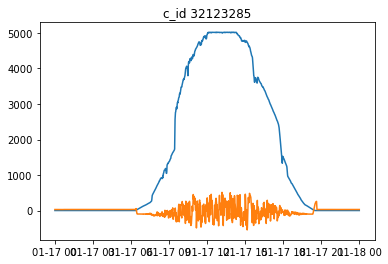

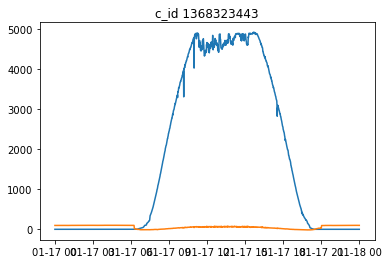

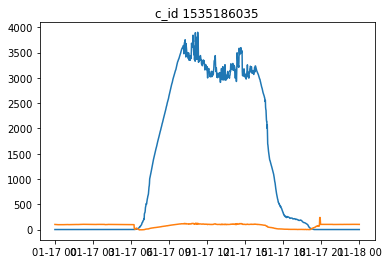

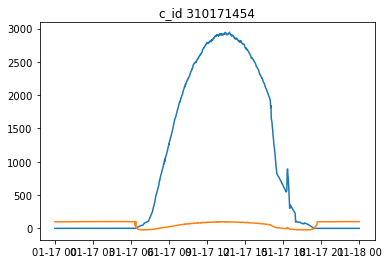

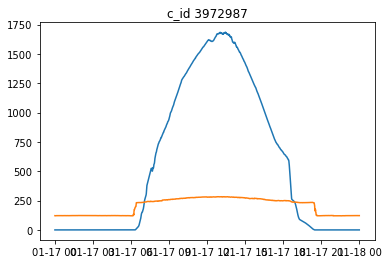

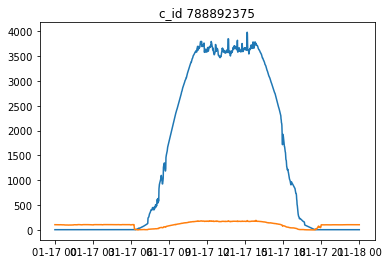

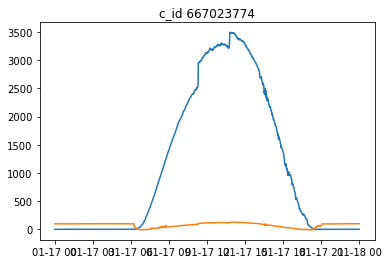

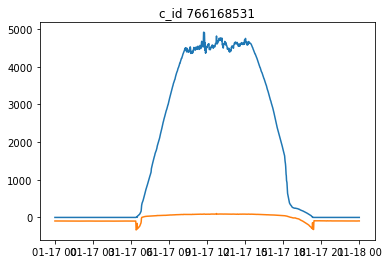

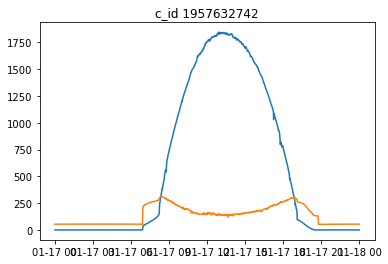

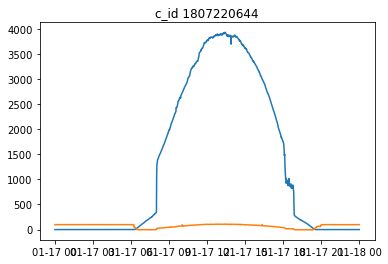

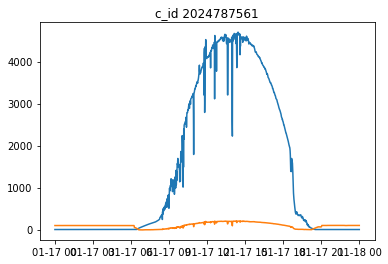

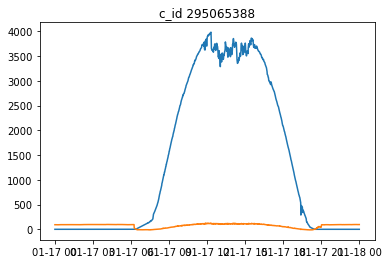

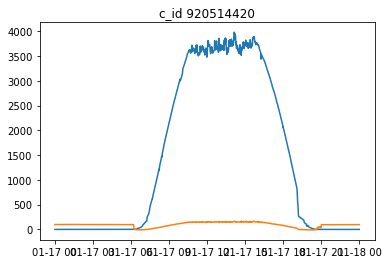

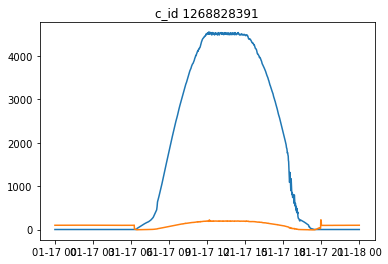

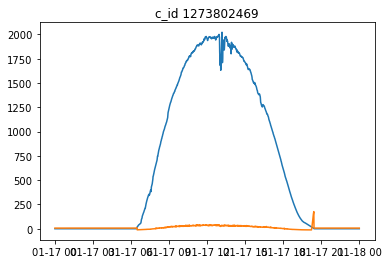

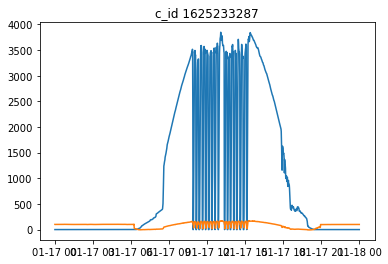

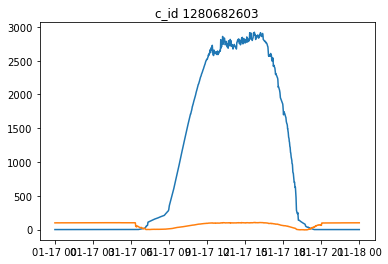

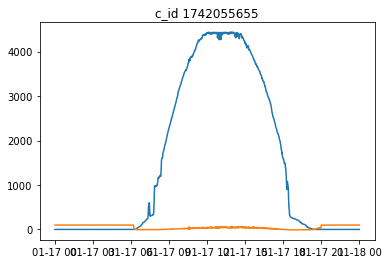

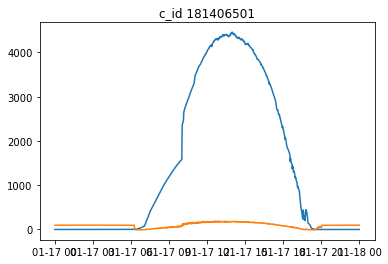

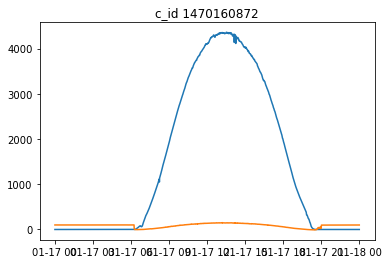

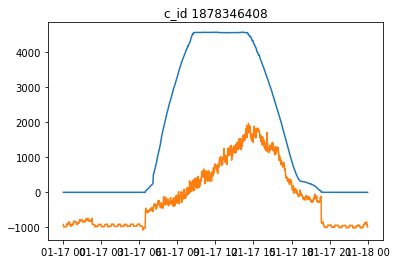

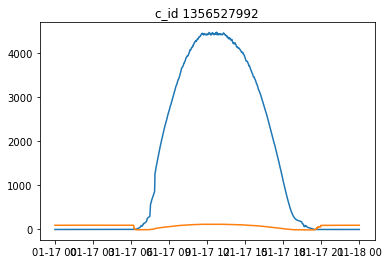

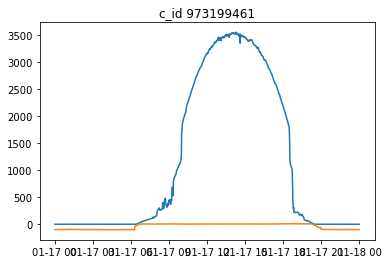

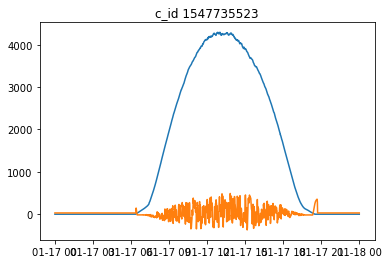

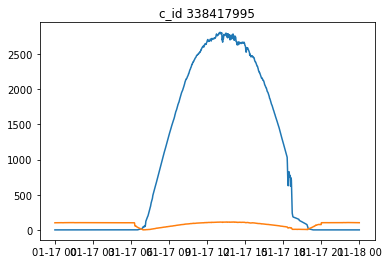

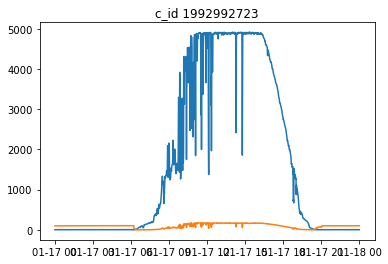

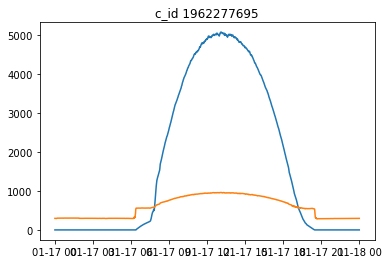

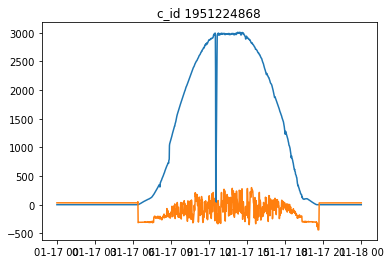

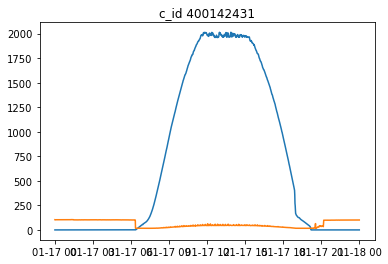

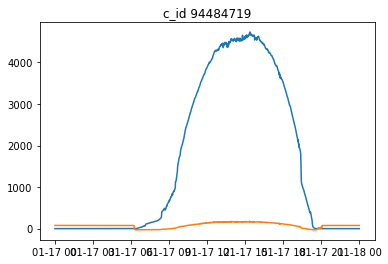

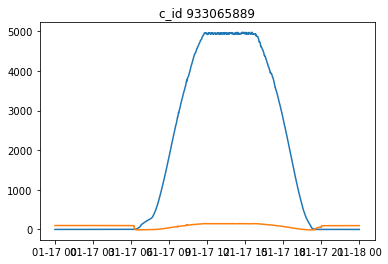

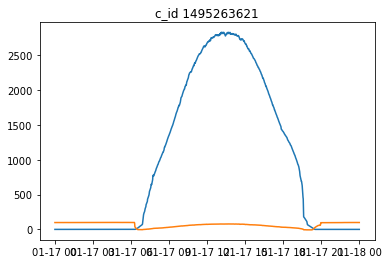

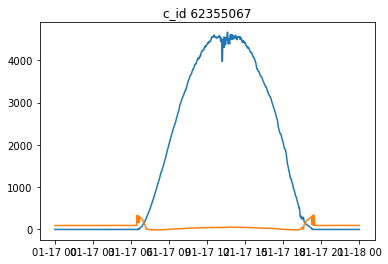

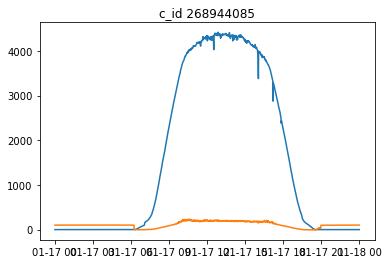

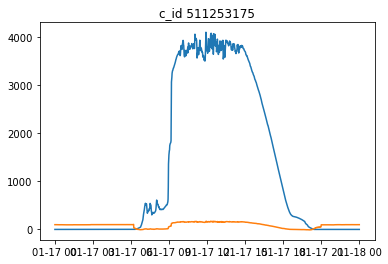

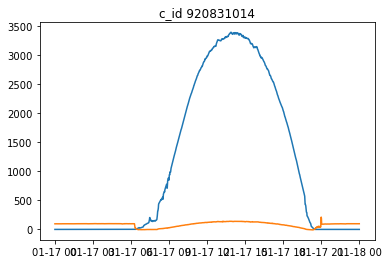

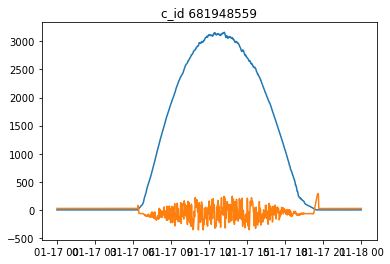

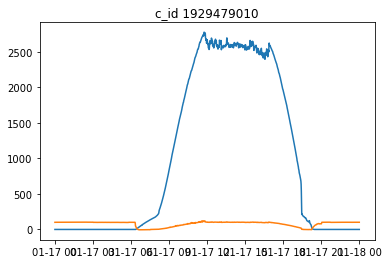

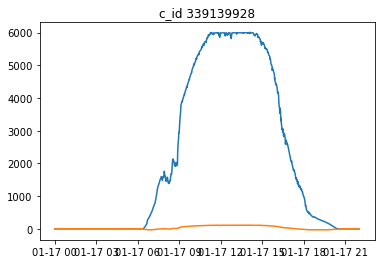

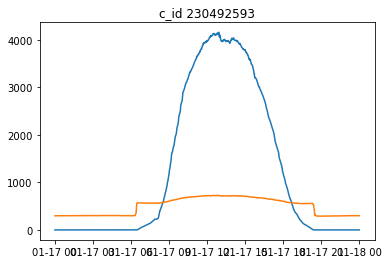

In [41]:
c_id = 898652745
for c_id in c_id_lists:
    data_site, ac_cap, dc_cap, eff_system, inverter = site_organize(c_id, site_details, data, unique_cids)
    data_site = resample_in_minute(data_site)
    plt.plot(data_site['power'])
    plt.plot(data_site['reactive_power'])
    plt.title('c_id {}'.format(c_id))
    plt.show()